## PROBLEM STATEMENT-
1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)


In [5]:
!pip install spacy
!pip install wordcloud
!python -m spacy download en
!pip install typer --upgrade
import warnings
warnings.filterwarnings("ignore")


[notice] A new release of pip is available: 23.0 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     --------------------------------------- 12.8/12.8 MB 19.2 MB/s eta 0:00:00
[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use
the full pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')



[notice] A new release of pip is available: 23.0 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Importing Packages

In [107]:
import numpy as np # linear algebra4
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#### Reading the data 

In [19]:
musk = pd.read_csv("E:\\deeksha\\python\\data\\Elon_musk.csv" ,error_bad_lines=False,encoding = 'latin-1')

In [20]:
musk.head(30)

Unnamed: 0                                               Text
0            1                             @kunalb11 Im an alien
1            2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2            3                @joerogan @Spotify Great interview!
3            4                    @gtera27 Doge is underestimated
4            5  @teslacn Congratulations Tesla China for amazi...
5            6  Happy New Year of the Ox! https://t.co/9WFKMYu2oj
6            7  Frodo was the underdoge,\nAll thought he would...
7            8     @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)
8            9  @flcnhvy @anonyx10 Indeed! Tweets definitely d...
9           10   The most entertaining outcome is the most likely
10          11                       @GiveDirectly Just sent some
11          12         Just agree to do Clubhouse with @kanyewest
12          13                            https://t.co/3rWE9uHSTS
13          14     @geoffkeighley @UnrealEngine Its getting real
14          15  Bought some Dogecoin for lil X, so he can be a...
15          16  @JoshManMode He definitely has issues, but the...
16          17                   @freewalletorg Thanks for fixing
17          18            @freewalletorg Please unlock my account
18          19               @AstroJordy <U+0001F923><U+0001F923>
19          20    This is true power haha https://t.co/Fc9uhQSd7O
20          21  @freewalletorg Any crypto wallet that wont gi...
21          22                      @freewalletorg Your app sucks
22          23  RT @SpaceX: NASA has selected Falcon Heavy to ...
23          24                                   @ajtourville Yes
24          25  @BLKMDL3 @RationalEtienne @Adamklotz_ Once we ...
25          26  @RationalEtienne @Adamklotz_ Starlink is a sta...
26          27  @RationalEtienne @Adamklotz_ SpaceX needs to p...
27          28  @ID_AA_Carmack Lowest cost per ton of carbon s...
28          29  @Adamklotz_ Its meant to be the same price in...
29          30  @tobyliiiiiiiiii This is intended for Earth, b...

#### Performing EDA on data

In [9]:
musk.shape

(1999, 2)

In [10]:
musk.size

3998

In [11]:
musk.isna().sum()

Unnamed: 0    0
Text          0
dtype: int64

In [12]:
musk.duplicated().sum()

0

In [13]:
musk.dtypes

Unnamed: 0     int64
Text          object
dtype: object

In [21]:
musk = [Text.strip() for Text in musk.Text] # remove both the leading and the trailing characters
musk = [Text for Text in musk if Text] # removes empty strings, because they are considered in Python as False
musk[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [22]:
musk

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [23]:
##Part Of Speech Tagging
# nlp = spacy.load('en')
nlp = spacy.load('en_core_web_sm')

In [24]:
one_block = musk[4]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)


In [25]:
one_block

'@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!'

In [26]:
for token in doc_block[0:50]:
    print(token, token.pos_)

@teslacn PROPN
Congratulations PROPN
Tesla PROPN
China PROPN
for ADP
amazing ADJ
execution NOUN
last ADJ
year NOUN
. PUNCT
Now ADV
on ADP
to ADP
the DET
next ADJ
for ADP
even ADV
more ADJ
! PUNCT
! PUNCT


#### Filtering for nouns and verbs only

In [27]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[0:50])

['execution', 'year']


#### Counting tokens again

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:2]

word  count
0  execution      1
1       year      1

#### Visualizing results
#Barchart for top 10 nouns + verbs

<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

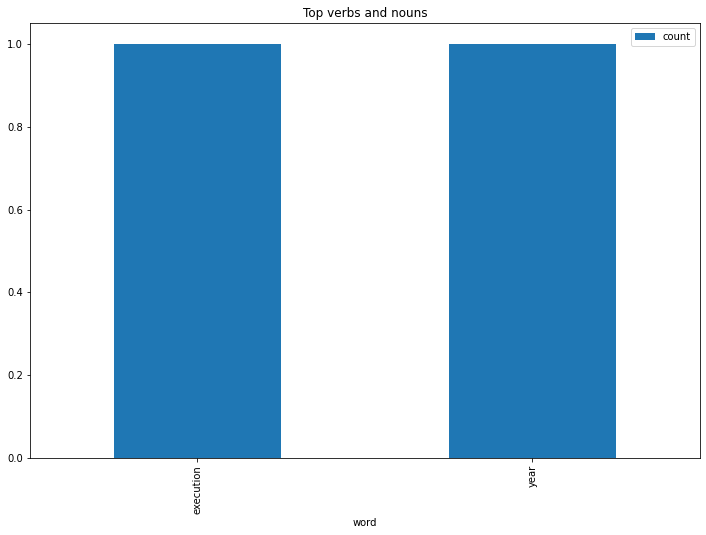

In [31]:

wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

####  checking on other blocks- 

In [32]:
two_block = musk[1]
doc_block = nlp(two_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [33]:
two_block

'@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?'

In [34]:
for token in doc_block[0:50]:
    print(token, token.pos_)

@ID_AA_Carmack ADV
Ray PROPN
tracing VERB
on ADP
Cyberpunk PROPN
with ADP
HDR PROPN
is AUX
next ADJ
- PUNCT
level NOUN
. PUNCT
Have AUX
you PRON
tried VERB
it PRON
? PUNCT


#### Filtering for nouns and verbs only

In [35]:
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[0:50])

['tracing', 'level', 'tried']


#### Counting tokens again

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:5]

word  count
0  tracing      1
1    level      1
2    tried      1

<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

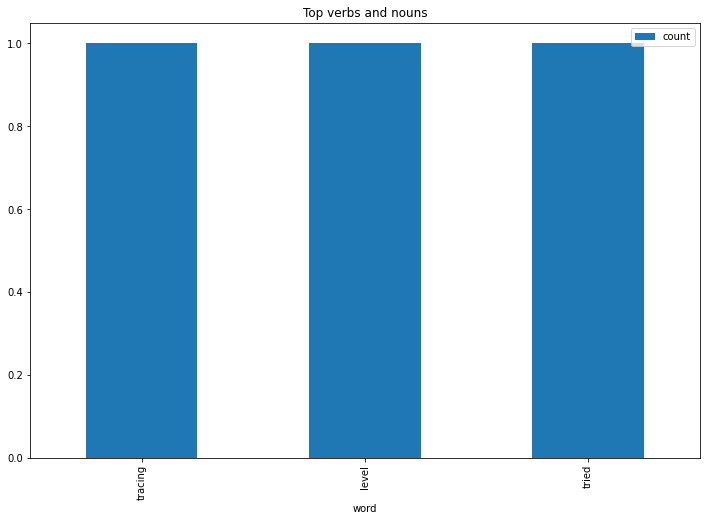

In [37]:
##Visualizing results
#Barchart for top 10 nouns + verbs

wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

## PROBLEM STATEMENT-2
1) Extract reviews of any product from ecommerce website like amazon

2) Perform emotion mining

In [38]:
review = pd.read_csv("E:\\deeksha\\python\\data\\Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")

In [39]:
review.head()

id             dateAdded           dateUpdated  \
0  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
1  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
2  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
3  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
4  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   

                                                name       asins   brand  \
0  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
1  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
2  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
3  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
4  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   

                                          categories primaryCategories  \
0  Computers,Electronics Features,Tablets,Electro...       Electronics   
1  Computers,Electronics Features,Tablets,Electro...       Electronics   
2  Computers,Electronics Features,Tablets,Electro...       Electronics   
3  Computers,Electronics Features,Tablets,Electro...       Electronics   
4  Computers,Electronics Features,Tablets,Electro...       Electronics   

                                           imageURLs  \
0  https://pisces.bbystatic.com/image2/BestBuy_US...   
1  https://pisces.bbystatic.com/image2/BestBuy_US...   
2  https://pisces.bbystatic.com/image2/BestBuy_US...   
3  https://pisces.bbystatic.com/image2/BestBuy_US...   
4  https://pisces.bbystatic.com/image2/BestBuy_US...   

                                                keys  ...  \
0  allnewkindleereaderblack6glarefreetouchscreend...  ...   
1  allnewkindleereaderblack6glarefreetouchscreend...  ...   
2  allnewkindleereaderblack6glarefreetouchscreend...  ...   
3  allnewkindleereaderblack6glarefreetouchscreend...  ...   
4  allnewkindleereaderblack6glarefreetouchscreend...  ...   

                                    reviews.dateSeen reviews.doRecommend  \
0  2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...               False   
1  2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...                True   
2                               2018-05-27T00:00:00Z                True   
3                               2018-10-09T00:00:00Z                True   
4                               2018-05-27T00:00:00Z                True   

    reviews.id reviews.numHelpful reviews.rating  \
0          NaN                  0              3   
1          NaN                  0              5   
2          NaN                  0              4   
3  177283626.0                  3              5   
4          NaN                  0              5   

                                  reviews.sourceURLs  \
0  http://reviews.bestbuy.com/3545/5442403/review...   
1  http://reviews.bestbuy.com/3545/5442403/review...   
2  https://reviews.bestbuy.com/3545/5442403/revie...   
3  https://redsky.target.com/groot-domain-api/v1/...   
4  https://reviews.bestbuy.com/3545/5442403/revie...   

                                        reviews.text  \
0  I thought it would be as big as small paper bu...   
1  This kindle is light and easy to use especiall...   
2  Didnt know how much i'd use a kindle so went f...   
3  I am 100 happy with my purchase. I caught it o...   
4  Solid entry level Kindle. Great for kids. Gift...   

                                  reviews.title  reviews.username  \
0                                     Too small            llyyue   
1  Great light reader. Easy to use at the beach            Charmi   
2                           Great for the price      johnnyjojojo   
3                                   A Great Buy           Kdperry   
4      Solid entry-level Kindle. Great for kids       Johnnyblack   

                                          sourceURLs  
0  https://www.newegg.com/Product/Product.aspx%25...  
1  https://www.newe

In [40]:
review.isnull().sum()

id                        0
dateAdded                 0
dateUpdated               0
name                      0
asins                     0
brand                     0
categories                0
primaryCategories         0
imageURLs                 0
keys                      0
manufacturer              0
manufacturerNumber        0
reviews.date              0
reviews.dateAdded      3948
reviews.dateSeen          0
reviews.doRecommend       0
reviews.id             4971
reviews.numHelpful        0
reviews.rating            0
reviews.sourceURLs        0
reviews.text              0
reviews.title            13
reviews.username          0
sourceURLs                0
dtype: int64

In [41]:
review.columns

Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateAdded',
       'reviews.dateSeen', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs'],
      dtype='object')

In [42]:
review.head()

id             dateAdded           dateUpdated  \
0  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
1  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
2  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
3  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
4  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   

                                                name       asins   brand  \
0  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
1  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
2  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
3  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
4  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   

                                          categories primaryCategories  \
0  Computers,Electronics Features,Tablets,Electro...       Electronics   
1  Computers,Electronics Features,Tablets,Electro...       Electronics   
2  Computers,Electronics Features,Tablets,Electro...       Electronics   
3  Computers,Electronics Features,Tablets,Electro...       Electronics   
4  Computers,Electronics Features,Tablets,Electro...       Electronics   

                                           imageURLs  \
0  https://pisces.bbystatic.com/image2/BestBuy_US...   
1  https://pisces.bbystatic.com/image2/BestBuy_US...   
2  https://pisces.bbystatic.com/image2/BestBuy_US...   
3  https://pisces.bbystatic.com/image2/BestBuy_US...   
4  https://pisces.bbystatic.com/image2/BestBuy_US...   

                                                keys  ...  \
0  allnewkindleereaderblack6glarefreetouchscreend...  ...   
1  allnewkindleereaderblack6glarefreetouchscreend...  ...   
2  allnewkindleereaderblack6glarefreetouchscreend...  ...   
3  allnewkindleereaderblack6glarefreetouchscreend...  ...   
4  allnewkindleereaderblack6glarefreetouchscreend...  ...   

                                    reviews.dateSeen reviews.doRecommend  \
0  2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...               False   
1  2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...                True   
2                               2018-05-27T00:00:00Z                True   
3                               2018-10-09T00:00:00Z                True   
4                               2018-05-27T00:00:00Z                True   

    reviews.id reviews.numHelpful reviews.rating  \
0          NaN                  0              3   
1          NaN                  0              5   
2          NaN                  0              4   
3  177283626.0                  3              5   
4          NaN                  0              5   

                                  reviews.sourceURLs  \
0  http://reviews.bestbuy.com/3545/5442403/review...   
1  http://reviews.bestbuy.com/3545/5442403/review...   
2  https://reviews.bestbuy.com/3545/5442403/revie...   
3  https://redsky.target.com/groot-domain-api/v1/...   
4  https://reviews.bestbuy.com/3545/5442403/revie...   

                                        reviews.text  \
0  I thought it would be as big as small paper bu...   
1  This kindle is light and easy to use especiall...   
2  Didnt know how much i'd use a kindle so went f...   
3  I am 100 happy with my purchase. I caught it o...   
4  Solid entry level Kindle. Great for kids. Gift...   

                                  reviews.title  reviews.username  \
0                                     Too small            llyyue   
1  Great light reader. Easy to use at the beach            Charmi   
2                           Great for the price      johnnyjojojo   
3                                   A Great Buy           Kdperry   
4      Solid entry-level Kindle. Great for kids       Johnnyblack   

                                          sourceURLs  
0  https://www.newegg.com/Product/Product.aspx%25...  
1  https://www.newe

In [43]:
review.isnull().sum()

id                        0
dateAdded                 0
dateUpdated               0
name                      0
asins                     0
brand                     0
categories                0
primaryCategories         0
imageURLs                 0
keys                      0
manufacturer              0
manufacturerNumber        0
reviews.date              0
reviews.dateAdded      3948
reviews.dateSeen          0
reviews.doRecommend       0
reviews.id             4971
reviews.numHelpful        0
reviews.rating            0
reviews.sourceURLs        0
reviews.text              0
reviews.title            13
reviews.username          0
sourceURLs                0
dtype: int64

In [44]:
review.isna().sum()

id                        0
dateAdded                 0
dateUpdated               0
name                      0
asins                     0
brand                     0
categories                0
primaryCategories         0
imageURLs                 0
keys                      0
manufacturer              0
manufacturerNumber        0
reviews.date              0
reviews.dateAdded      3948
reviews.dateSeen          0
reviews.doRecommend       0
reviews.id             4971
reviews.numHelpful        0
reviews.rating            0
reviews.sourceURLs        0
reviews.text              0
reviews.title            13
reviews.username          0
sourceURLs                0
dtype: int64

In [45]:
product_review = review['reviews.text']

In [46]:
product_review.dtypes

dtype('O')

In [47]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline


In [48]:
product_review[:10]

0    I thought it would be as big as small paper bu...
1    This kindle is light and easy to use especiall...
2    Didnt know how much i'd use a kindle so went f...
3    I am 100 happy with my purchase. I caught it o...
4    Solid entry level Kindle. Great for kids. Gift...
5    This make an excellent ebook reader. Don't exp...
6    I ordered this for my daughter, as I have the ...
7    I bought my Kindle about 2 months ago and the ...
8    amazon kindle is always the best ebook, upgrad...
9    It's beyond my expectation, and it can even sh...
Name: reviews.text, dtype: object

In [49]:
review.columns

Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateAdded',
       'reviews.dateSeen', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs'],
      dtype='object')

In [50]:
# Removing spaces 

In [51]:
product_review = [x.strip() for x in review['reviews.text']] # remove both the leading and the trailing characters

In [52]:
product_review

['I thought it would be as big as small paper but turn out to be just like my palm. I think it is too small to read on it... not very comfortable as regular Kindle. Would definitely recommend a paperwhite instead.',
 'This kindle is light and easy to use especially at the beach!!!',
 "Didnt know how much i'd use a kindle so went for the lower end. im happy with it, even if its a little dark",
 "I am 100 happy with my purchase. I caught it on sale at a really good price. I am normally a real book person, but I have a 1 year old who loves ripping up pages. The Kindle prevents that, it's extremely portable (it fits better in my purse than a giant book), and I have it loaded with lots of books. I finish one and start another, without having to go store. It serves all my needs. I picked this one over the Paperwhite because the price was unbeatable and the only difference that I could see was this one wasn't backlit. A simple book light from the Dollar tree solves that issue. This is my seco

In [53]:
len(product_review)

5000

In [54]:
## importing nltk library

In [55]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [56]:
## Tokenzing the data

In [57]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(product_review))
sentences[5:15]

['im happy with it, even if its a little dark I am 100 happy with my purchase.',
 'I caught it on sale at a really good price.',
 'I am normally a real book person, but I have a 1 year old who loves ripping up pages.',
 "The Kindle prevents that, it's extremely portable (it fits better in my purse than a giant book), and I have it loaded with lots of books.",
 'I finish one and start another, without having to go store.',
 'It serves all my needs.',
 "I picked this one over the Paperwhite because the price was unbeatable and the only difference that I could see was this one wasn't backlit.",
 'A simple book light from the Dollar tree solves that issue.',
 'This is my second Kindle (the first being the old Keyboard model, which I put down because I fell out of love with the keyboard.',
 "Lol) and it most likely won't be my last."]

In [58]:
pd.set_option('display.max_colwidth', None)

In [59]:
df = pd.DataFrame(sentences, columns=['sentence'])

In [60]:
df.head(1000)

sentence
0                                                                                        I thought it would be as big as small paper but turn out to be just like my palm.
1                                                                                         I think it is too small to read on it... not very comfortable as regular Kindle.
2                                                                                                                         Would definitely recommend a paperwhite instead.
3                                                                                                          This kindle is light and easy to use especially at the beach!!!
4                                                                                                          Didnt know how much i'd use a kindle so went for the lower end.
..                                                                                                                                                                     ...
995                                                       While I have Alex Echo (and love this), having a screen that can connect to other smart home devices is amazing.
996                                                                                                I love the jokes, random questions I can ask or telling me the weather.
997                                                                                                                                        Its essential in our house now.
998  The best part about the echo is that you can actually use it to watch videos, the security cameras connected to your house, listen to music and watch the baby sleep.
999                                                                                                                                                   I love my Echo Show.

[1000 rows x 1 columns]

In [61]:
#Sentiment analysis
afinn = pd.read_csv('E:\deeksha\python\data\Afinn.csv', sep=',', encoding='latin-1')

In [62]:
afinn

word  value
0       abandon     -2
1     abandoned     -2
2      abandons     -2
3      abducted     -2
4     abduction     -2
...         ...    ...
2472      yucky     -2
2473      yummy      3
2474     zealot     -2
2475    zealots     -2
2476    zealous      2

[2477 rows x 2 columns]

In [63]:
afinn[1500:]

word  value
1500  masterpieces      4
1501        matter      1
1502       matters      1
1503        mature      2
1504    meaningful      2
...            ...    ...
2472         yucky     -2
2473         yummy      3
2474        zealot     -2
2475       zealots     -2
2476       zealous      2

[977 rows x 2 columns]

In [64]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline
import pandas as pd
re = pd.DataFrame(sentences, columns=['sentence'])


In [65]:
re = pd.DataFrame(sentences, columns=['sentence'])

In [66]:
re

sentence
0                                                             I thought it would be as big as small paper but turn out to be just like my palm.
1                                                              I think it is too small to read on it... not very comfortable as regular Kindle.
2                                                                                              Would definitely recommend a paperwhite instead.
3                                                                               This kindle is light and easy to use especially at the beach!!!
4                                                                               Didnt know how much i'd use a kindle so went for the lower end.
...                                                                                                                                         ...
11773                                                                                                                Purchased this for my son.
11774                                                                                   Has room to upgrade memory to allow more books & games.
11775                                                                         But the speakers could be better or located in a better position.
11776  I had some thoughts about getting this for a 5 year old, but if you get the screen protector and a case I feel it will last a long time.
11777                                                                            this is a steal, have 8 gb model as well.This has more punch..

[11778 rows x 1 columns]

In [67]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [68]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(re))
re[5:15]

sentence
5                                                                   im happy with it, even if its a little dark I am 100 happy with my purchase.
6                                                                                                    I caught it on sale at a really good price.
7                                                          I am normally a real book person, but I have a 1 year old who loves ripping up pages.
8     The Kindle prevents that, it's extremely portable (it fits better in my purse than a giant book), and I have it loaded with lots of books.
9                                                                                    I finish one and start another, without having to go store.
10                                                                                                                       It serves all my needs.
11  I picked this one over the Paperwhite because the price was unbeatable and the only difference that I could see was this one wasn't backlit.
12                                                                                   A simple book light from the Dollar tree solves that issue.
13              This is my second Kindle (the first being the old Keyboard model, which I put down because I fell out of love with the keyboard.
14                                                                                                     Lol) and it most likely won't be my last.

In [91]:
sent_df = pd.DataFrame(re, columns=['sentence'])
sent_df

sentence
0                                                             I thought it would be as big as small paper but turn out to be just like my palm.
1                                                              I think it is too small to read on it... not very comfortable as regular Kindle.
2                                                                                              Would definitely recommend a paperwhite instead.
3                                                                               This kindle is light and easy to use especially at the beach!!!
4                                                                               Didnt know how much i'd use a kindle so went for the lower end.
...                                                                                                                                         ...
11773                                                                                                                Purchased this for my son.
11774                                                                                   Has room to upgrade memory to allow more books & games.
11775                                                                         But the speakers could be better or located in a better position.
11776  I had some thoughts about getting this for a 5 year old, but if you get the screen protector and a case I feel it will last a long time.
11777                                                                            this is a steal, have 8 gb model as well.This has more punch..

[11778 rows x 1 columns]

In [70]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [71]:
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [72]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [73]:
# test that it works
calculate_sentiment(text = 'accused  ')

accused  


-2

In [74]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

I thought it would be as big as small paper but turn out to be just like my palm.
I think it is too small to read on it... not very comfortable as regular Kindle.
Would definitely recommend a paperwhite instead.
This kindle is light and easy to use especially at the beach!!!
Didnt know how much i'd use a kindle so went for the lower end.
im happy with it, even if its a little dark I am 100 happy with my purchase.
I caught it on sale at a really good price.
I am normally a real book person, but I have a 1 year old who loves ripping up pages.
The Kindle prevents that, it's extremely portable (it fits better in my purse than a giant book), and I have it loaded with lots of books.
I finish one and start another, without having to go store.
It serves all my needs.
I picked this one over the Paperwhite because the price was unbeatable and the only difference that I could see was this one wasn't backlit.
A simple book light from the Dollar tree solves that issue.
This is my second Kindle (the

My son is an avid reader, and noticed that he needs to charge his Kindle considerably less than when he uses his tablet.
Great item, easy to use,would recommend to anybody want to use!
I bought this as a gift to my dad and he loves it.
Well worth if you dont plan on reading in dark.
the future of reading you just have this and it is like a whole library I bought this for my daughter, wanting to get her a kindle without having access to games (like with the kindle fire).
This latest version of the kindle is excellent.
I am jealous of my daughter and now am thinking about upgrading from my older kindle.
The touchscreen is responsive.
If you like reading on the kindle, it is worth the update.
This is a great way to read books on the go.
There's no backlight, so reading in darker rooms may be hard.
But it's affordable and portable and a great way to take all your books with you.
I love the Kindle, it is a great product.
It reduces eye strain so I enjoy reading on it.
This is my second Kind

Voice activated message and/or video calls to Amazon Show owners or Alexa App holders.
Highly recommended.
I have one Alexa and three Echo dots and having Echo Show now is awesome!
Omg I love my amazon show it is sooo cool and does a lot of cool stuff Great looking design.
Amazon Echo Show was easy to set up and use.
The product is very entertaining and useful.
Would recommend it to anyone.
Got it for few weeks but it kind of fades away from your life.
This device is awesome ‚Äò really lets you get very excited about smart home technology ‚Äò I‚Äôm buying a second one for my upstairs I purchased this for my daughter and when I tell you she was so happy she hugged the box then me and back to the box!
Overall product is excellent.
Speakers should have a capability to be used as Bluetooth speakers like the echo.
I have the spot, dot and two shows, I started out with the spot and loved it so much I wanted a bigger one.
This was a (Best Buy) !
No pun intended lol I was a little hesitant to 

I purchased this as present for a friend and since I have an Echo I can video chat with her to check in.
The quality of the video is great.
Like having another person in the house, I talk to Alexa more then my wife I really love it I use it everyday and it works great We struggled with a surprise Christmas gift this year.
The store sales rep suggested this and it was a hit!
The Echo Show is a game changer, it's amazing as are all the Echo's but with this one you can watch video's, or see who's at your door.
The things that Echo can do are limitless, it's like having a personal assistant.
Another great product by Amazon, super fun and great for entertaining the family and guests.
Great product fun to use.
Very easy to set up and begin useing Gift for a relative they said they loved the gift.
Same as echo but with a screen which adds to the appeal to this product.
Purchased this because I was buying the echo dot for my daughter and thought this would be fun for the family.
We play music 

It's not a big deal, just get a little closer or louder and she follows the request/answers the question.
Love it!
Nice add on to work with Arlo pro cams or if you like to sing karaoke with alexa At first I was concerned with the funny looking angle I saw on the pictures.
The item was not displayed at the local store so I decided to take a chance.
As an owner of the Echo Dot i figured it would work in the same manner and it does.
I love that it works with the Arlo Pro.
The screen is great and I soon figured out the reason for the funny angle of the item.
The angled screen works great Only setback or recommendation would be to add a auxiliary output at the rear.
Also you can watch prime movies, YouTube videos etc.
I bought the white version and have it in the kitchen.
I use it for EVERYTHING, music, video, phone, security cams, news, weather.
It's the perfect kitchen assistant.
This Alexa is the best one out of all them due to the screen feature I love everything about this Alexa... if 

Recommend to anyone Works great!
Now if my dogs would actually answer when I call it would be even better!
They‚Äôre just not interested but at least I can see what they‚Äôre doing i love the addition of my echo show to my other Alexa devices.
Having the screen to read recipes and viiew notes is great!
If you are looking for something to help you keep more organized or keep you up to date with weather, markets, and the latest news the Amazon Echo Show is what you are looking for.
Honestly, the product is top of the line technology, and is easy to use as long you are patient and work with it, and read the directions.
The size of it is truly perfect; it honestly reminds me of the size of normal alarm clock that would have on a nightstand, and with that it truly can serve that purpose.
It also has a touch screen, and I feel it is very durable and can stand to last.
The sound quality is also superb, with dual 2-inch speakers.
It has Bluetooth capabilities as well, but it only works with an

Plug n play, easy to use.
Speakers are good for music.
I love this thing!
It‚Äôs so fun and easy to use.
My 3 year old even uses it to play the trolls or lion king soundtrack The Echo Show is a great addition to the Amazon family.
Works just like the Echo, but with a 7" screen.
Bright vibrant display.
Rich clear sound.
Works great with Arlo security cameras.
Excellent smart home addition.
Just hope Google and Amazon start playing nice with each other soon so youtube will work again.
purchased for a capstone team to test and review how it would benefit today's journalist.
This product is super easy to use and the sound quality is terrific.
I use it every day!
The easy of use is also appreciated!
Fairly easy to use on set up and use.
Most annoying issue is when the kids try to talk to her.
Mainly use for music and general information.
I do like the Alexa stuff and how it can connect to my phone.
Plan on getting the door bell video stuff next.
Amazon ECHO show is excellent with add-on vid

Its great, just needs expanding information on it.
We had the Echo (still do, it's just in another room) and purchased the Show.
We also have a couple of Dots and have them all set to communicate with each other.
As you walk by the Show, it gives mini tips, news, fun facts, etc.
Love it!
You can even use it like Skype with others who have a show.
My wife wanted this, so I got it as a gift.
Even though I have had an Amazon Echo for a year, I think the Show is much better.
The screen takes a lot of the mystery out of what Alexa is doing.
Both my wife and daughter love it.
This thing is awesome, great speakers on it too.
Go out and grab one Our 5th Echo Show.
We love the Drop In feature, allowing us to use them as an intercom.
The ease of playing music on all of them at once throughout the house, and controlled from any device is used daily.
The connection to our Sonos system is a real plus.
Also connected to our Dish TV receiver.
I love the Echo Show and its many features, great purchase

Hopefully software updates will fix the minor problem, and a second generation will hopefully fix the hardware downfalls.
Voice recognition is also not as good as the eco dot.
I am not recomending this product at this time because of the cost and poor performance.
Easy setup for connections to wi-fi cameras, Amazon Digital Subscriptions and coming soon....YouTube.
Add your videos and BOOM...to the screen they come.
Good for Amazon music and news.
Brilliant for controlling lights in the house.
I had reservations for the purchase of this Echo show, they quickly eroded after setting it up and using it now since Christmas day.
Everyone in my family loves the camera function, sound quality, picture resolution and basically everything about it!It isn't totally perfected yet but it is a work in progress when it comes to the skills and how you choose to use this device since it is definitely designed for Amazon and their customers.
Versatile enough so that everyone could find something to enjo

Requires too many components.
Cameras, etc.
stick with basics (in my opinion).
Very easy to set up and use.
Really like the screen to view the items searched for, and to read information about the searched item.
It does everything amazon, and I can even see who is at the front door with Arlo!
It doesn't do Netflix, or Hulu, but that's okay.
I really like the sound, it fills small rooms.
It's easy now to video chat with Nana, or drop in to tell my kid's goodnight, when I am working late.
This really is a great product, it has performed as expected so far A great new Amazon device to add to my other Alexa products.
The visuals are amazing, and it is so easy to use and set up.
I love my amazon show it‚Äôs a recommended product if you wanna have this item.
However the down sides are it has a great speaker so if it‚Äôs full max it may be hard for Alexa to hear you.
Another downside google hates amazon = not YouTube.
I bought this device for my girlfriend to use in the kitchen so she could l

Love the new video version !
Easy to setup and great to use!
Echo show is a great product.Good with my security cameras and playing music.Youtube would be great.
If you use an Echo, you will love the Echo Show.
Bought this one for a relative after they experienced mine.
Great product and it is very easy to set up and use Echo show easy to set up.
Wish it included the swivel base that is a option now.
Love the added video!
Plays any music you request, answers questions, even tells jokes to my 10 yr old.
Much more capability than we've unleashed yet!
Alexa with screen?
LOVE it!
Works perfectly with my Ring doorbell.
We got this since we have the previous echo and love them.
Easy to use and set up.
Highly recommend!
Its a lot more then we expected.this is a wonderful addition to our tech life I bought several Alexa‚Äôs for Christmas gifts also for myself also bought Amazon Show for Christmas gift also for a my youngest Daugter !
This does the same stuff as the traditional Echo or Echo Dot

It was priced well and I find it useful.
We are new to connected home equipment.
I got this for my wife in our kitchen.
The only thing I wish was different would be that the Amazon Show would communicate directly with FaceTime rather than having to have someone download the Alexa app.
Not a deal breaker by any means though.
We love it I love my new Alexa Show.
Checked prices thoroughly and Best Buy was was the ‚Äúbest‚Äù and 5 minutes away.
Product is great.
Easy setup and works as stated.
Staff very helpful.
Would recommend this product and definitely this model.
:) We purchased the Echo Show for Christmas this year, and love it so much!
Our kids got the hang of it faster than we did (ages 11 and 13)!
Highly Recommend!
We bought the Amazon Echo Show for my dad.
We set up accounts for him to access music and pictures and wrote down a sample list of commands he could use.
He loves it.
Excellent product.
No end to the features you can set up.
This device is alot better than the small ale

Can use Amazon photo but we do not prescribe.
My whole family loves Alexa.
We have the dots in all the bedrooms.
I love the smart home features you can add.
I love the music offered as a prime member.
And when you‚Äôre bored at home she will play games with you or even read you a book Love the echo show.
Nice to have a visual.
Love the drop in feature!
Can use many differents apps from the Echo Show.
Awesome product!
I got this for a really good price.
I already had the Echo Dot that I was kind of unimpressed with.
I love the echo show.
There are so many more things to do and the sound quality is great.
I‚Äôve been enjoying this item and getting information so fast.
Best purchase I ever made.
Easy to set up.
Plus, the screen is very clear and easy to view.
Not sure I would like this, however, words to songs..Great and ability to view my outdoor and Indoor cameras is a plus.
Still learning to use.
Family is having fun with Alexa.
I do like the way it integrates with other devices around

This is a perfect upgrade to my kitchen Amazon Echo.
The speaker itself is a substantial upgrade over the Echo and Dot.
I have it connected to my Nest security cams and it's great to check on my dogs when they are having play time in my fenced backyard.
It can be a bit distracting with it's random invitations to "try" certain skills, but the distraction is worth it!
This product absolutely represents the future that I imagined when I first watched Back to the Future 2 decades ago!
The only con's that I can think of is sometimes Alexa doesn't hear me so well (same for the Echo and Dot) and it currently can't differentiate between users like Google Home can.
I have had the Google Home too, and would highly recommend any of the Amazon devices over the Google Home.
This is my 5th Amazon Alexa product.
I used to have the Alexa Echo, but moved that up to my bedroom.
Now I use the Echo Show downstairs and has good sound quality.
I also like that I can add my Home Security system to operate th

All in all, very fun, helpful, item.
It can order you pizza too.
Is better than face time when calling my kid, since they have one, IÔ∏è could call them from my and see them at the same time, perfect for cooking timer n best for music Setting up the amazon show was a little tricky,but I managed to navigate through it.
It‚Äôs so cool to add compatible equipment.
I have really enjoyed these products so much I actually bought 3 of them.
Fun to watch and even better if you are an Amazon Prime customer for music and video.
As advertised......................................
I love my echo show it does so many interesting things I‚Äôm on it all the time I recommend it to anyone who enjoys getting up to date information I am enjoying the Echo Show a lot.Very entertaining I had looked at this for a while.
I was thinking about purchasing it when Amazon was offering the buy on get the second one for less offer, but when both they and Best Buy dropped the price to $149 I jumped on it.
It's perfec

Nice device.
We use it a lot in the kitchen and the home automation.
The video is pretty good and the speaker is better than I thought it would be.
If Amazon and Google can work things out, the Show will be amazing!
We already loved the Echo and the Dot, and were looking forward to adding video.
Unfortunately, YouTube is no longer on the Show, limiting the video content.
If they can ever get it back, the Show will definitely be a 5 star product!
The show is definitely amazing, especially if you have the doorbell with video and security cameras, you can see it with echo show.
I love this product!
The possibilities are endless!
It's great!
I love the hand free whatever you want.
It plays videos on Amazon by just asking it to play.
At work I can video call my girlfriend at home with the show as well.
Highly recommend Purchased to stay in touch with family while traveling.
Absolutely Awesome!
Great product, recommend that Everyone have one!
Traded my original echo for echo show.
Glad I did

Still learning the variations of commands, and sometimes it hears what it wants to until I have to ar.
tic.
u. late.
to the point of annoyance, but hey, this is still relatively new tech, and who would have imagined this 20 years or more ago I like it.
Needs more features to really become a good product.
Needs browsing capabilities.
This is a great addition to the other Alexa products by Amazon.
It works great in the kitchen.
Better voice recognition and sound.
The onscreen display and information are very helpful.
The video capability is watching instructional videos or even playing music videos while working/cooking.
It can also scroll personal photos as a picture display.All in all Echo Show is a wonderful addition.
Well worth it, especially if you get it on sale.
Purchased this item for our daughter.
She absolutely loves it!
After researching and reading endless reviews, I bought myself an early Christmas present in the Amazon Echo Show.
Once I had it home, it was quickly set up an

I have the spot, dot and two shows, I started out with the spot and loved it so much I wanted a bigger one.
This was a (Best Buy) !
No pun intended lol The Alexa show is a great product and the price was even better I‚Äôm all about the smart home and I love my new echo show.
I stay more connected with my family.
I also love how it‚Äôs integrated with my Arlo, Ring, Nest, and Hue light bulbs.
Love this!
We have it on our kitchen counter and great for music, news updates, amazon delivery updates, recipes, timer, and soo much more!
Tech is not totally friendly but for The cost and what it does it is worth the investment Great product and it is very easy to set up and use Purchased for my mom in a memory care center.
She doesn‚Äôt have to answer the phone, we simply drop in and start talking until she sees us.
Picture clarity awesome!
Staff also aware of this camera feature and knows we drop in frequently.
Doesn‚Äôt replace room camera but good.
Would give a 5 but can‚Äôt figure out how to

It's easy now to video chat with Nana, or drop in to tell my kid's goodnight, when I am working late.
Facilitates easy home set-up of many Smart devices.
I have really enjoyed these products so much I actually bought 3 of them.
Fun to watch and even better if you are an Amazon Prime customer for music and video.
Great electronic , very easy to install me and my family enjoy the things that Alexa do very satisfied with my service that I received from Best Buy when I purchase it looking forward to shopping there more often and I'm a new customer there The show has some nice features but the audio quality isn‚Äôt the best for the price point.
I got mine on sale and am just using it for a bedroom alarm clock.
I can read the time without my glasses.I still use my Sonos Play 1 to listen to my sleep playlist and ny other music.
Unless I missed something it seems like if I set the volume low at night to listen to music to go to sleep my alarm will not be loud enough.
So I don‚Äôt use the Show 

Having a severe hearing loss, the 'Show' gives me visuals along with captions so that I can follow what Alexa is saying!
The Echo show with video screen is a nice upgrade to the other echo‚Äôs.
News briefs with videos are nice.
Very good sound quality for playing music.
This is the only one you need !
it's like having the Dot, Echo and IHome all in one with a screen !
So great to instantly see family members to chat, demonstrate, check-in... PLUS all the wonderful features of the Echo devices including video clips, movies, etc .
It is amaizin I like the way you type and search my favorites This has quickly become one of the most used at the kitchen counter!
If you have Alexa an you like it, a must have upgrade.
This is our second Show.
And, one of several Christmas gifts.
These are convenient and fun!
Easy to set up.
We use our Alexa devices as whole house intercom and for listening to music.
I use Alexa every day.
I do not know how I lived with out her before We purchased the Amazon -

It is an lot of fun.
It will be more helpful once I have completely set up./ I‚Äôve enjoy my echo since I purchased it !
The light bulbs are great to I will be buying more products Wanted one for awhile so finally got one.
Works great.
Way better than Siri on my iPhone.
Speaker works great for music.
Very happy overal These items are easy to set up.
They have added value to our home.
Works great!
I bought 2, 1 for the kitchen and 1 for master bath.
I will definitely recommend this product .
The tech support is also easy and friendly.
Alexa keeps my husband company during the day answering his questions.
I originally purchased this to use as a Bluetooth speaker for my wife's music but soon realized that we would use this much more than we thought.
Ya, turning on and off lights is good and being able to dim with the included bulb is pretty great but there are hundreds of smart home type of apps that work with this including my Sony Google TV and more show up regularly.
Makes it almost to

Once straightened out works great.
I have no idea how my family ever lived without these products!
Since purchasing the Alexa Hub and Hue bulb, we've purchased Echo Dots for our kitchen and son's room.
We absolutely love the convenience of the bulbs and Alexa is a life saver on so many levels.
This was a present for my husband who originally had asked for a radio for his home office.
He set it up relatively quick and was amazed at the sound quality.
He loved the versatility and that he could have a specific radio station played or a random song as well as tell a joke, etc.
It has been fun for all of us and we are looking into getting the smaller "dots" for other rooms now.
He commented that he would NEVER get rid of this!
It's very fun and functional.
The Smart bulb is very handy as well.
Love it!
I have been contemplating purchasing an Echo product for some time now.
I finally did it and I am so pleased I did.
It was extremely easy to set up.
I add my lights to the process and now it 

Want to know the distance to someplace or the population of some city or country, yes!
We're still discovering what it can do and it seems limitless.
Absolutely love this!!
This does not give great answers and the connection is not that great.
Exchanging for a GOOGLE Home We all love ALEXA!
You can play games like Jeopardy or would you rather family edition.
The kids love to have Alexa tell them jokes.
Alexa Exceed expectations in it ability to control I've had an Amazon Echo and Dot for over a year now.
I really wanted to develop the Smart Device usage around my house and when the upgraded Echo i just had to have it.
It is a great device.
I use the drop in feature to communicate with others in the house, especially when they are upstairs, without having to yell.
The smart hub is amazing.
Attaching to smart devices is much more seamless than with the 1st gen echo.
Just got it so time will tell, but the 2nd gen Echo devices are worth it.
Works great with WeMo and Philips Hue.
Great soun

Doesn‚Äôt take up a lot of space.
When I used to think of amazon echo I think flimsy sounds, Amazon Echo was more of ECHO-Ing, tin can complex... at least from what I have experienced with my friends echos.
Echo Plus you ask... Not so much!!!
This device has such excellent sound!!
One of the best devices I have ever purchased!
If I could I would have these all over my house.
Forget the dot and the echo 2nd gen. Echo plus is the way to go!!!
Beautiful device, sounds is second to none!
Went to my local Best Buy and a friendly employee greed me and ask me if I needed any help, I ask about the echo and the google assistance and the employee explained the pros and cons of each device and even show me other ones.
With his help I end up pickin the new echo Plus (Alexa) and I absolutely LOVE IT!
I really like the Phillips Hue Bulb included and I am definitely going to buy more!
My customer experience was really great and I am very grateful for the courtesy, knowledge and the time this employee

Can't live without it now!
A fun little device on the cutting edge of consumer artificial intelligence.
Sp aker sounds pretty good.
Alexa does have some problems understanding how I ask questions a fair amount of the time.
I was wishing I good set it up to my pool equipment.
Excellent item... above and beyond my expectations It works great and is easy too use.
The salesman was a tremendous help.
I bought this for myself and another one for a gift, you must have Wi-Fi to use as well as a smart phone.
Good product and wasy to set up.
Works well with smart lights.
This is great for inquisitive minds.
Alexa plays music, turns the light on, answers questions and so much more.
ECHO PLUS OFFERS SO MUCH MORE FOR THE SMART HOME., HOWEVER, I HAVE HAD THE DOT FOR A LONG TIME AND YESTERDAY I BOUGHT 5 ECHO DOTS FOR MY CHILDREN .GREAT PRODUCT.
great sound.
Love the music and the electrical devices you can work with it.
My home is about 80% automated with help from ALEXA...We want to have one in each

Easy to use.
On sale & was purchased as a gift for Christmas, really great deal!
Love the concept and how I can make my whole house a smart house.
Decent sounding music device...easy to connect and use the app.
Getting custom routines set up with smart home (vivint, hue, etc) takes some trial and error figuring out commands.
Would buy again.
Really enjoy the Echo Plus, this is a must have for all homes!
So far the Echo has been extreme useful.
My husband just says start my day in the morning and it gives him the weather and traffic before he leaves for work.
It is also is nice to tell it to turn on and off lights in the home with the smart bulbs.
Overall I'm extremely satisfied with my Echo plus.
I bought this for my 14 year old daughter and she loves it!!!!
This amazon Alexa plus is awesome...it‚Äôs works great and easy to set up Love this product.
I can ask questions and play music...also link my lights to it!
I am so glad that I bought this Echo, it has made it easier to automate my

Very easy to set up.Changed how I do a lot of things.
Pretty cool product.Features are limited unless you spend a lot more money buying other things you can connect and interface with.
But the basic unit with one lightbulb is a pretty good start.
Just know going into it that you will be shelling out a lot more to expand the system.
The sound of the Echo Plus is good, and the matte black color looks stylish.
The Phillips Hugh Bulb that was included with my purchase is nice and convenient.
Purchased as a gift for my 14 year old son.
He absolutely loves it.
Uses to place music, ask questions and turn off his lights!
Still learning what all she can do but it definitely makes life easier.
She could perform some tasks ,but most things she didn't know.
So agrivating.
We love the Echo II.
Its an awesome product.
Great price too My husband loves the ability to listen to anything and to be able to run the living room light when he comes in instead of trying to find the light switch.
I have been 

The echos just keep getting better and more useful.
To use.
Putting in after Christmas.
Want all lights on voice activation.
This is great.
It's a lot of fun and much better than I expected The whole family uses the ECHO we love the ability to use just say Alexa and tell here what we want.
The youngest granddaughter loves the insult generator!
I love my Amazon Echo!
Alexa is compatible with all of my technology and super easy to use.
My favorite is the ease of making a grocery list and having it in the app instead of forgetting my list at home.
Great little speaker I use it every day and I have it about for three days already Added Alexa hub and expanded the lighting capabilities.
Easy setup and it works like a charm.
Looking for more devices to add to the mix!
Alexa is the greatest device to have around the house.
She basically runs my house for me I purchase this at the store and I was not given any bulb till I decide to do review Got this for my Dad for Christmas.
Awesome gift, he w

nice and compact, great sound, easy to use, love it.
Love this bot and lighting system.
It transforms my house into many moods.
Planning to get more lights and maybe another bot.
Love having the Echo to get quick weather reports, play music, and other helpful information.
I have several home automation devices and the Echo Plus controls all of them.
I was so happy with automation, I bought an Echo Dot and Echo Tap.
having an assistant like Echo makes life so much easier Love how it hooks up to lights.
And can play any music Alexa is easily confused and fun to mess with but also informative when we are being serious.
She disappoints when she loses connection with the wifi; but it's not often.
We have 6 different Alexa products and after a few hiccups; all are working well.
Impressed.
First time user of the Alexa plus.
Using it more and more every day.
Love it We had heard a lot about the Echo Plus and had seen the commercials.
We have not been disappointed as Alexa is a welcomed family 

My first Alexa product and I‚Äôm going to say I‚Äôve had her for about a month and I love it have it hooked up with my Phillips hue lights works awesome Great and fun , almost like having someone in the room with you I love the Alexa.
It has encouraged me to automate my home.
Now I have lighting that comes on when I ask, My heat is controlled wherever I am and it's fun asking her (Alexa) questions.
She's becoming part of the family, but, the Echo Plus is not much different (that I have discovered, yet, anyway) than the Echo 2nd generation.
I haven't had the Echo 1st generation and so I do not know.
I have had the Echos (Plus, Echos-2nd generation, and Dot) about 3 weeks and the only thing I think makes the difference is that it has a better sound quality, but, we are talking for those really connoisseur kinds of ears or the ones that like to turn up the volume.
The Hue lightbulbs are great.
I bought the Echo Plus on a Black Friday extended Sale and the Hue lightbulb was a real bonus, f

Good price for a great product.
I would purchase another one.
This was a gift for my kids.
They love them.
Easy to use and lots of great apps!
This is my 2yr.
olds and he loves it.
He loves the different games and watching reviews.
My fianc√©e really enjoyes it!
I would definitely recommend.
Love the safety features for parents to protect their little ones from some content on the Internet.
Love preloaded programs I recommend it for kids .great for find games easily.
Decent somewhat slow.
Netflix freezes up at times.
Great tablet for destructive toddlers.
My son has dropped and thrown it several times and it still works!...
I replaced my kindle that I had for 4 years with the new one and after a short time was able to access all my books and continue reading the book that I was reading before I bought the new kindle.
I am pleased with the new touch screen for moving to the next page, like that this one is smaller and easier to take in my purse.
I did purchase a case and it is protectiv

Easy for her to navigate.
We love this table for our 5 y.o.
It gives him the sense of independence he wants and me the sense of calmness knowing I can control what he gets on and how long he can spend in screen time!
In my opinion this model is too small and feels cheap.
And sd card slot.
This little sorcerer's box displays magical pictures and bright pretty colors.
I bought this tablet for myself because I bought the 8 gb one for my 6 year old and was so impressed with it that I bought myself the 16 gb one I bought this tablet for my 8 year old granddaughter.
She loves it!!!
The display is very clear and easy to see.
The set up allows for you to choose child safe settings with PIN protected parent lock to help protect young users from inappropriate content.
This is well worth the affordable cost!
for the price this is a great works well the for the price display is hd love it I was resistant to putting down my real books and begin using a kindle.
I'm so glad I did.
It's so convenient 

They loved it and so did I.
So many things to do on them and so much of what they love.
I now got it as well for my 2 year old.
The best part of it all is the cases come with the tablets and they have 3 colors to choose from, so perfect for me.
Bought it for my wife and I haven't heard any complaints, so I think it's great.
If she's happy I'm happy My nephew is going to college next year and we want to give him a gift.
Kindle suits it well for him to learn and study.
reviews were quite on spot with this product,very easy setup and very easy to use My son enjoys to play with his tablet but definitely you gotta take a little time to set it up for them to be safe while they are playing with.
I bought this tablet right after Black Friday.
It had good reviews, a perfect warranty for kids, and a reputable branding.
Once set up, it has a good cover that is light and hard for a child to remove.
The included one year software Freetime is user friendly and convenient to navigate.
So far, we real

It also has the parental safeguards.
My kids loved it, they were able to learn how to use it right away Bought this for a 2 year old.
She loves it!
She's already got more things figured out on it than I do!.
Good educational programs and some fun ones too!
I bought this tablet for my 4 year old grand daughter and she loves it.We set the parental controls for her age group, and now we don't have to worry about what she is doing on it.
We downloaded her favorite disney movies onto it, and now she has her own little private movie theater.
It also works great with our Amazon Fire TV and can watch a lot of her favorite kid shows.
This is a great buy for the money and I recommend it to everyone.
My nephew loves his kindle.
Durable structure that can withstand drops.
Will definitely keep buying Kindle fire from Best buy I purchased this as a replacement for my older Kindle.
It is excellent as always but I also noticed very little new features or updates since my last Kindle model.
Would have 

SHE LOVES IT AND NOW SHE WON'T NEED TO STEAL MOMS TABLET OR PHONE.
Bought this for my 90+ year-old, totally no-tech mom.
Her first e-book is Gone with the Wind.
She likes the size and ease of use.
My 9 year old loves it.
Good control options.
Just need to figure out how to get the Web browser on her side.
Great tablet.
Perfect for my 8 year old son!!!!!!!!!!!
Nice deal, and good stuff.
will recommend to others if same deal This is a newer version of the Fire I had previously and I love it.
I like the camera.
This version is lighter than the other.
It is taking me a while to learn the differences but most of them are improvements.
Difficult to purchase.
No stock in 6 stores, no order online or ship to store available.
When it did become available it did not work.
Once it turned on, I couldn't get any further.
I could not log onto wifi network, though other items in my household work.
Also the product wouldnt move past setting up the clock.
Tried 3 days, gave up and returned the item.
Du

Great price.
I observe my 4 year old granddaughter using this tablet with ease.
She is able to play some of the games and upload movies.
Her mom had to put a secret password for the movies because she downloaded some that you had to pay for!
The kindle fire hd is a sweet tablet for reading and apps like netflix or hulu.
My kids love this product, as do I. Parental restrictions can be set and they know when they have to shut them off.
Good battery life too.
Really good for KIDS use kids lock so they don't see what the don't suppose to see love this I love the tablets HD picture is beautiful.
The fire tablet is very fast to load and is easy to use.
Great tablet.
I bought my Kindle about 2 months ago and the battery is already dead and will not charge This little device is great for it price.
Lots of features.
Bought two as gift to kids.
They love it very much Easy to use, handle and screen is perfect for a toddler.
Love the idea of it.
Not as easy to put the DVD movies on it .
My daughte

Also there is no brightness controller for the screen so you can only read it where it's light.
But I honestly love my kindle, it does it's job and I don't want anything that get's fancier than this.
I bought both of my children one of these tablets...they love it.
Best electronic I purchased for myself this year.
Great price too.
easy to use great product and BEST BUY ANSWERED MY QUESTIONS This product is well thoughts the kids seem to like the apps This is my first Fire Kindle.
I love it.
It is fast, and has good internet.
It gives me quick access to all my Kindle library.
I found out it's easier to scroll through the pages than when using Kindle Touch.
The graphics and sound on this tablet were better than expected!
It is well designed with a safe cover for kids.
It also come with 2 year warranty.
My son loves it already.
I purchased this tablet and am very happy with it.
i love the kindle fire 7 tablet.
it is wonderful and awesome.
Wish it was a bit faster loading and browsing, but

This one has a great camera and is much slimmer.
My son really enjoys this.
Its his first tablet(he is 4) and had no problem learning how to use it.
Has been very durable with kids and easy to use.
Great product for price.
Great camera for a beginner very easy to understand This was a great tablet for the price for my wife.
Perfect size and good for traveling.
My nephew always uses my sister's iphone when watching videos.
He loves his youtube videos lol.
So I went out and bought him this.
The kid loves it.
There's value in the cartoon membership also May grandson loves this.
Went on a long car trip and he was able to watch movies and keep entertained.
Granddaughter loves it, easy for a toddler to hold and maneuver.
I was a slightly skeptical about giving this to my 1 year old but it has been a fantastic, durable learning tool for him and he is progressing very quick.
My 2 year old son really enjoys the tablet it's great Easy to use and navigate, purchasing books is fast and simple and 

Numerous things they can do on it and also nice to be abke to control it as a parent.
The color is what got me and the features was on point.
The screen shows a lot of different displays.
To share for now until the next one.
This is a great entry level tablet.
It does not have all of the bells and whistles of more expensive tablets, however, at its price point the specs are quite impressive.
This is an easy purchase for a small sized tablet or for a child.
It is powerful enough and the screen quality is good enough.
Overall, I highly recommend it.
I gave as a gift to a kid who has autism!
It has been helping on his development a lot!
Works great for my daughter, great price and apps.
My daughter love it she don't really brother me it keep her so busy My grandkids love to use it.
It has so much for them to choose and they learn too.
This kindle is amazing and better than prior versions.
i love my kindle ..i read on a plane or at the pool, works in different lighting and angles My grandd

Got tablet for my daughter..love everything about it and how easy it is to use.
I bought this for my mom.
The type is adjustable and it has a backlight for easy reading !
This is a good tablet for my son to use to play his games.
You get what you pay for Was not to happy but for a 3 year old it's ok The best tablet for kids the 1 year unlimited apps is my favorite my kids love it..
I bought this for my kids its a cheap alternative to an Ipad mini and should they lose it or break it its easy to replace with little out of pocket.
Has all the functionality a child needs with easy parental controls.
Like the child profile with only approved content.
Works great with good storage but, lacks online browsing speed.
Works well.
Easy to use.
I like the auto on when you open the case I bought the tablet and it is very nice.
I really like the night time mode to use before bed so you can still sleep.
my grandchild really enjoy playing and watch videos on her Kindle I bought this for learning and e

My daughter is 5 & enjoys it.
I compared this to other learning tablets and found for the price & protection plan this works best for us.
It works nice.
Still seems like ancient techonology compared to any apple product Amazon keeps getting better.
Tablet now has option to move icons, set wallpaper and more.
With added SD card option, is even better.
I have not explored all the features of the kindle fire tablet yet.
Why does the sound always have to be reset each time?
I want it to stay on full sound maximum loudness always.
I have to reset it each time I fire it up to listen to music.
What's up with that?
Please direct me someone!!!
Bought this tablet for my son..great battery life, shipped fast..great value!
I like the ipad its very helpful my son has learned alot and i hope that it will help other kids too as they prepare for pre k It replaces my 6" Fire Kindle.
Love the HD quality.
was supposed to be a gift.
there was a glitch in your computer system and it told me I wouldn't rece

I don't have a tablet for myself.
If I did, I would get the Fire.
All I would really need it for would be to surf the Web and use the apps.
For the price, u can't go wrong.
I have two kids and they both love it.
Its also nice because it is already setup for them.
Since I purchased mine the wife thought she would also like one so we picked up her one and she is using it a lot.
Got two for my kids for Christmas and they're awesome!
And also got lucky they scanned to $20 less than advertised price!
Woo!
Awesome tablet for young children.
They love to play all the videos that it came equipped with already on it.
The parental controls are amazing!
Super easy for my daughter to operate What can I say, if you enjoy books and magazines it's hard to beat.
Not backlit but not an issue for me.
I take it everywhere and enjoy this version very much.
I didn't want to buy my 8 year old something really expensive but I wanted a good device so I tried this out and she loves it.
The case that comes with

This tablet is perfect for my mom.
She primarily uses it for playing games, the calendar and taking pictures.
The camera is a decent camera for a 7" tablet.
Hopefully she'll use it to read books and magazines as well.
It was too slow he didn't put any attention to it.
Battery didn't last.
Good to use it to read books under light.the price is lower than other website.
Give this product a 10 tons of great learning programs.
Loved the Fire HD7 but the latest HD8 is sharper, faster and still handles great.
This tablet is very good for my daughter of age five.
I like the way I can read many books and magazines as well as play various games on my kindle.
Video quality is very good.
Works well with Amazon Prime Video and Music - no surprises there.
Apps are VERY disappointing - many common apps are not available - even though there are Android versions!
Not bad if you have modest expectations.
Goog tablet the only bad part is that you have to be creating a profile and thats where it gets comp

It ended up being the most popular gift that she got it does a wonderful job for children My grandson loves it.
Will be getting another one.
These are great tablets for the kids and the price is wonderful with the warranty and the soft, yet bulky (a good thing in this instance) case.
The only thing I wish, was that it could access the Google Play Store so my kids could watch the movies we have in our Google Play Movies account.
Awseome tablet for toddler.
I would recommend this tablet for all age groups.
It's a really good tablet for children good parental controls expandable up to 128 gigs I like that so it allowed me to download as many things for the children to utilize separate from the Internet all around is a good device I've had lots of tablets in the past, mostly from the Samsung line, but this is my first Amazon Fire, so I want to write this review for others who have never tried one of these.
At the time that this was written, Alexa had not been added to the tablet.First, whi

I'm still waiting for it.
I'm greatly enjoying this device.
It's simply fun to use the tablet.
There are weaknesses that come with that lower price tag, but you legitimately get a lot of bang for your buck, particularly if you regularly use Amazon services.
If you don't typically use Amazon and you are just looking for a tablet for viewing the Internet and you're looking for a low price tag, this device may be OK for you.
Both love this tablet and the numerous educational apps available that I bought one for each I have several Kindles so knew what to expect.
It is a great reading device and I keep several in different locations.
My 5 year old sons love it , Seems to be well made .
I bought 2 of these, 1 for each of my 2 youngest Grandaughters.
Wanted something that would be made well, easy to use and as they get older the range of use could expand.
Not only is it a good activity but a great learning tool.
I will download fun and game activities but learning also even though many of th

The only thing I wish, was that it could access the Google Play Store so my kids could watch the movies we have in our Google Play Movies account.
The tablet is for my son who is 2.
That being said I noticed blotches on the screen.
Never returned it due to it not making a difference to my son.
I will have to upgrade him in question few years anyway.
The bumper is amazing.
i bought this as a backup.
I am currently using the same headphone.
My 2 1/2 year old loves this.
He can't break it with the thick rubber case, and we can control the games he plays, and how long he plays.
Great mix of educational and fun items.
The only problem is the charging cord is a bit too easy to break.
If they pull it off the charger, it makes the port loose and you have to get the right angle for it to charge.
Easy to navigate.
Daughter loves it.
It's lightweigh and its just what she needed for this avid reader.
Looks pretty solid will update review as soon as gift is opened .
My first Kindle and I love it.
N

I downloaded books and apps with ease.
I'm glad that she is loving her Fire.
Bought for my eight year old.
She absolutely loves it!
I can use my tablet all time and your conecctions is very good My son loves his kindle fire tablet.
It is perfect My daughter absolutely loves her new fire, lots of space, easy to set up and lots of apps Very user friendly and straight forward instructions great for all ages Tablet good for kids and some adults.
Price and screen resolution were also a selling point.
Great Tablet for children...comes pre-loaded with lots of applications for loads of entertainment for younger children.
It also comes with a 2 year warranty at time of purchase.
My kids love their kindles and love free time in it.
Numerous educational games!
Bought this for my grandson and am very pleased with the quality.
The case protects it well.
We bought this for our daughter, she plays with it a lot and really loves it.
Easy to use for a 5 year old.
She loves it.
I just don't like that my

We take it everywhere.
This has been an exceptional hit for us she totally loves it.
Great product, for a very good price!
Loved this tablet My 2 yr old loves his tablet.
Best purchase ever.
It has great educational videos and is easy for him to work on his kids profile.
Amazon got it right!
My daughter loves her tablet I love free time love the case it came with just right to buy for a kids first tablet Like it so much I gave them out as gifts for Christmas My grandson really enjoys his new Kindle that he for for a Christmas present.
This is the second one I bought.
My grandkids love them.
Great tablet for my kiddos they love these kindle fire kid tablets and they are very strong hold up to a lot.
Price is great too.
Looks nice can't wait to try it out!
Great price for a tablet.
Bought for my 2 yr old grandson.. and he loves it has a lot of learning numbers alphabet and shapes Bought for grand daughter for Xmas since most 5 year olds now a lot about tablets and had no problem with thi

Great purchase for a 9-year old girl.
Easy way for peaceful long car rides.
I bought this because I recently signed up for Amazon Prime and wanted to take advantage of the free books.
Nice tablet.
Love it.
Would definitely recommend to a friend.
Just the right size to hold in one hand and "turn" pages with the other.
This new Fire tablet with 16 GB of internal memory is an upgrade from my older 8 GB version, allowing more storage of books, movies and apps.
I bought the tablet for my 2 year grand daughter.
The system comes with a set of kid friendly games and allows you to put the tablet on kid mode.. this keeps her in the "safe zone".
I also installed ABC Mouse.
Another hit program My brother told me about this product.
I bought it for my son and he loves it.
My 5 year old son loves his kindle.
He can fully work it himself.
We love all the he age appropriate games, learning apps, and books.
The case is great for all those accidentally drops.
My 3yr.
old loves this tablet.
Easy for her 

Love the features that allow us to control her time spent on it.
My only complaint is that its processing speed is quite slow getting between different menus but at this price and for a 3-year old I can't complain too much.
Great!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
I was unable to find a new Kindle in-store and was excited to find Best Buy had them online and I could purchase it and have it delivered simply and easily.
There is nothing spectacular about this item but also nothing majorly wrong with it.
The biggest flaw is that this is geared to kids and there is no way that I have found searching settings or online to lock the touch screen so that a video keeps playing if the child hits the screen.
This means lots of times helping get back into the movie or show rather than just relaxing like an iPad can do with guided access activated.
I purchased two of these tablet a pink and blue.
They was for my 5 and 7 years children.
They really love their tablets.
Yes, it was a birthda

He LOVES it and it has a great warranty!
Good product for a young child to play with without breaking I bought this for my almost 3 year old niece and her dad told me she loves it!
It has really cute educational games on it and is pretty much indestructible with the case on it.
The only reason I didn't give it 5 stars is that the charger has broken already.
Great at home but still trying to figure out what apps work not connected to wifi I I thought the buy For my child bc the kids mode but it was very poor The images are crisp and text very easy to read.
Apps are good and easy to navigate.
Love it.
So far I haven't had any trouble with this tablet.
Only thing that sucks is this I can't text from it.
If anyone who's an app for it let me know!
Thank you !
Kid prof and comes with free books and games I like it grandson really enjoyed it Christmas.
very easy to use Quality comes with apps installed durrible love the case I like this ereader.
It is a little small, but you can increase the 

This tablet is grrrrrrreeeeeeeeaaaaaattttttt for the children!
Very easy to handle.
many books to choose from and very convenient I love my kindle it makes it so much easier to read books instead of having to carry them with me Good tablet for a 1 yr old.
At first was not interested and still not but bought in in case and maybe one day if they decided to use it on a road trip.
Good product for the price I got this tablet for Skype calls and browsing.
It's good if you don't have an ample scope of tasks I was worried that my son wasnt going to like the software, but he's having lots of fun with it Picked this up for my two year old granddaughter.
She loves it and its the first thing she picks up to play with.
She can play a lot of the age appropriate games and can navigate around really easily.
I even use it sometimes!
The Kindle is amazing.
This is my second one.
The price was misleading however as I had to pay something like another extra 30 bucks to get rid of the ads.
Just know that 

Honestly considering buying one myself a new one.
It is great to be able to have all you books in the same place... Great apps, excellent price, my kids really enjoy it Love the apps.
His old fire stood up to significant wear/tear and drops.
So I'm expecting the same with this one.
2 year warranty gives piece of mind.
Thanks.
We really like this tablet .
It's easy to use Got this for my grand niece, she loves it.
Can't beat it for the price.
I have enjoyed using the Fire HD.
It is fast and easy to use.
I also appreciate all the things it will do.
The Apple Watch is great.
I am very happy with the purchase.
Love to rad my books with my kindle and download straight from my device.
So easy and safe.
Lovit.
Thanks Best Buy Bought for Christmas for 6 and 8 year old granddaughters.
Both girls loved it and have said it was their favorite gift.
My son is 3 and he loves this tablet.
It is very educational and worth the money Didnt know how much i'd use a kindle so went for the lower end.
im hap

I bought this for my daughter.
It's a little limited in what it can do, but she loves it.
She's a little too young to understand the games, but she loves watching cartoons on it.
I bought this tablet to replace one I had (different brand) that was worn out.
This is a pretty good tablet for the price.
I just wanted something to use til I could get something bigger.
I've had no problems with it other than some of the games I played on my other one not being available on the Fire.
My daughter loves her kindle and it's larger than the previous one she had.
She enjoys it!
BOUGHT FOR MY GRANDKIDS AGES 5-10 AND THEY LOVED IT I purchased this tablet for my grandmother to use.
She loves it.
It is easy to navigate for her.
The only thing that annoys her is when the apps need to be updated.
She does not have internet at home so she has to wait to update her apps when she visits family (who has internet service).
These were ordered one for 4 year old and then ordered second one for 2 year old.
The

The kids love it.
I purchased these tablets for my grandchildren after purchasing 1 for another grandchild in October.
They love them and their parents love being able to dictate how they use them.
1st kindle screen failed & had to reboot often.
Customer Service couldn't fix.
Replaced.
2nd one screen reboots often.
Customer service offered replace.
Just want one that works.
Can't get upgrade replacement This is the 3rd one I've purchased.
I've bought one for all of my nieces.
No other case compares to this one.
It has held protected the tablet so many times from them dropping it.
My only problem with this tablet is if you don't have internet you lose the pictures of the games you have installed and you have to guess to open them.
I purchased this Kindle for my daughter and she really enjoys using it !
!
My 5 year old sons love it , Seems to be well made .
Great value, a lot of color choices.
I was able to boost up the memory for just a little extra but made the apps run so much faster.

Last Christmas I gave my nephew a fire stick, which he loved.
In the meantime, I purchased an Amazon Tap for myself.
Since he likes gadgets, I knew he would want one.
So I purchased it for him great for listening to prime music, quick weather reports.
volume adjusts quickly and gives status of battery on request.
I was a little skeptical at first about the Amazon tap but after discovering how easy it was to set up, I was able to connect to my music library with ease!
Great sound and nice to have the portability to take with me!
Love Alexa....it works so well.
Speaker system is excellent and it is amazing how many things it does!
I use this hours a day.
Whether it is for listening to spotify or turning on a wemo-device, the battery life, sound quality, and voice recognition is great.
Sound quality is amazing.
I really like the ability to take this on the go.
Downside.
I wish I didn't have to press the button to talk and to wake the product up Was gift fot my daughter.
she seems to enjoy

The only flaw is that it IS NOT waterproof...Amazon if you are listening make the next Tap waterproof!!!
Works really well with echo and is really neat and fun Great speaker for around the house listening to music and asking questions This is great for the beach or by the pool.
If you already own an Echo, this is a great addition to the household.
This is a great personal speaker.
I have both the Tap and the Echo.
The only downside to the tap is you actually have to physically "tap" the mic button to activate Alexa.
The sound quality is pretty good for the price.
If you can afford it, I would upgrade to the Echo.
This item was very easy to use from the very beginning and was very responsive to my request and commands.
I like the fact that you can also add other items to work with it bought as a gift for my daughter.
actually sounds better and easier to set up than expected.
the personal assistant feature is really amazing, instant response to requests for information and music.
I bough

Works as Bluetooth speaker with your comparable phone.
I love my new toy.
Alexa is my personal girl Friday.
She understands what I want and retrieves it.
Easy to set up and use.
Good price works great would buy again good value for the price Music, full home automation control, an assistant, calling, shopping and lists, much much more...anywhere with wifi, home or away.
Get one, you will not regret it.
Omg I am so enjoying this.
Sitting around the back deck with family wishing we have music that doesn't require plugs or wires.
Saw it online deals of the day read the reviews and ordered on he spot and drove a half hour drive to my closet Best Buy.
Play it now everyday.
Great speaker and Echo substitute.
This is great for on the go as a Bluetooth speaker and when connected to the internet it works great using the Alexa app.
I have been enjoying the amazon tap for two weeks, and am still finding new things it will do Is it operate my wife loves it my granddaughter knows how to operate a g

You do need to tap it to ask Alexa to do anything, but otherwise it works the same as Echo.
I prefer the Echo, but the Tap is great for college students and those who just want to supplement their Echo.
It's not bad for the novelty of Alexa.
Might as well get the echo.
Sound it not bad and I'm no audiophile.
Might be good when my echo dots come in.
Is it worth it?
There are better Bluetooth speakers out there.
I prefer spending the extra $70 or $80 to get the echo Great device I use it on a regular basis.
good investment It's 85% as good as an Echo... Great sound, nice and loud, but...
But the button.
That button!
!I would give this 5 stars and buy more of them, IF it was always listening while plugged in.
Other than that, it does everything an Echo does, it's smaller, and (due to the battery) portable.
I like it - I do.
But it's not as useful as the Echo in the situation I use it the most.
Amazing Sound!
All around great product!
Nothing negative so far.
I have an Alexa but wanted a s

Bought this gift for my wife and she loves it.
Works as expected.
Easy set up and amazing usefulness, love it.
I use it all the time and continue to find new ways to take advantage of all there is within Alexa.
Will purchase another one for bedroom!
Love this product.
It is nice looking, easy to carry, and the sound is amazing.
Very easy to set up and connect to amazon echo.
Nothing to complain about th he speaker itself.
However the carrying case is kind of stupid and useless also.
One has to take it down just in order to charge.
I love everything about it.... it is portable, sounds better than most portable speakers, and Alexa rocks it.
Only thing that kept it from a 5 star rating is that you have to manually activate Alexa.
Wish it would work like the Echo and Dot, while it is on its base.
We're in our 70s and and have a good time with it.
Guys, the Tap does everything Echo does and it's portable!
Use it at home for everything, at work on your desk for music, weather, etc, and even 

Best option that I found.
Love the tablet, not only for reading (upgrade from Kindle) but for searching the Internet, email, etc.
And I can take it anywhere.
Cheaper than an iPAD and does enough for what I need.
This tablet is certainly large which makes it cumbersome when reading in a reclining position.
However, its terrific for reading or watching films on a plane, desk or otherwise sitting up.
I got the amazon Fire HD 10 for reading and other activities.
It was very easy to set up.
Netflix worked ok on it.
It mostly works well, but there are limitations to the apps that are available.
I tried it out for a while and then returned it for a Samsung S2 9.7.
Excellent value priced 10" tablet.
To bad Amazon killed it.
I purchased it as a gift for my wife and she loves the size and quality of the display.
I bought this Tablet for my Wife.
She uses it every day.
It is very usefulto her.
She uses it in place of a computer.
She watches movies on it.The Graphics are excellent.
Just writing th

Second the price was very reasonable.
Third it had functions and capabilities that were suitable for my wife's skills and needs.
She absolutely loves it and I actually got a compliment on my present giving.
That don't happen very often let me tell you.
I will recommend this she's pleased I'm pleased what else do you need?
My son was able to piggyback off of this gift, and purchased her the cover to go with it.
So it really worked for my family.
And I made my wife happy .
I am reading positive reviews and wish I could say the same.
Best Buy is great, so this is not a reflection on them, just our experience with the product.
We have had this product for just over one month and I have had to contact Amazon Support, perform factory resets to get content to show up, and the device is poorly designed as the SD card pops out constantly, which messes with DRM, and does you no good if this happens when you are not connected to the Internet to fix it.
We are returning, and spending the extra mon

The build quality of the Oasis and its case is very nice, just like with the Paperwhite and the amazon leather case for it.
The only concern I have is how well it will protect the Kindle.
I will update the review if I find this to be a problem.I loved my Paperwhite, and I will recommend it to anyone looking to upgrade from an older Kindle or buying one for the first time.
It definitely is great and the better buy, but I am glad I decided to order the Oasis.
The reduced weight, ergonomic design, and page turn buttons make it worth the added cost.
Small, light, but comfortable to hold with either hand.
If you keep it in airplane mode with medium lighting, the battery last for weeks.
Lovin' it so far.
Second kindle I use it for reading,games,internet,and shopping Love Amazon however their tablet limits you to using their browser and their apps.
Go online and you can get around them and download google and the playstore.
Made my Fire into regular android tablet.
Much happier now.
My wife r

If money is not an object, I'd say get the Kindle Voyage, if it is, the Paperwhite is a fine little reader, and overall I'm happy I have it.
this kindle is very light so easy to hold for a long time without getting tired - worth upgrading your older version kindle...
I or a family member have owned every version of the Kindle since it came out.
This version has finally taken all of the best elements of the previous Kindles and combined them into one unit.
It is small and light, has both touch screen and button functionality (depending on which you prefer - I'm a fan of the buttons), and an excellent back-light.
Kindle battery life has always been excellent, and is no different here.
I use my Kindle daily, often for at least an hour at a time.
The only downside is that I'm not sure what other features Amazon could add to improve this version, other than perhaps making it lighter weight.
By far the best e-reader out there, and a worthy upgrade from a previous version Definitely easy on t

I've already read over six books with it in just 3+ weeks.
I have a previous version of the Kindle, but this one surpasses it in every way, from the resolution to the automatic brightness display.
Recommend it highly.
The Kindle voyager is absolutely a best product for reading ebooks.
The product is easy to read in all types of light.
I also like the ability to get word definitions and the expansion or text ability.
Upgrading from an older Kindle.
Wow.
Lighter.
Crisper text is an understatement.
Throw in the lighting and the new interface for page advancement.
Pricey but if you want the best, you won't be disappointed.
It's a great eReader and the font is much clearer than that of the Paperwhite, but that may not be enough to justify the extra $$$.
The page turn buttons are a great addition too.Would be good if Amazon would add audiobook capability though.
I've always been a reader and an early technology adopter but until now I've resisted moving to electronic media when reading for p

Recently purchased two more for gifts.
She hasn't used the it yet, but my son did a quick check and it seems just fine.
I have had a few kindle's in the past so this was nothing new for me but what I loved about this one is that the screen is big so when I am reading a book it's a lot easier than when I had the first kindle screen.
I mostly use it just for the reading but being able to navigate the internet on it is great for when I want to look something up about the book real quick or if you want to search reviews on a book before purchasing.
I love it!
this item work just as I expected it to, great product!
This Kindle is so overloaded with apps that I will never use.
Despite what one of Best Buys' associates said, you cannot remove any of the Amazon apps.
The apps take up too much of the memory.
I have an I Pad and love but bought this as a backup for work.
Unfortunately, it bogs down.
I also don't like that Amazon wants access to too much info to set up email, so I won't use this 

The fact that the graphics are worse than my phone detracts a little from the expirence, but serves to remind me that I cheaped out and bought yesterday's model.
This is not a real negative, it just appeares less crisp than my phone.
The increased picture size more than makes up for it in my book.
Husband loves the 8" tablet.
The screen is big enough to view what he is reading My daughter loves this tablet!
She plays multiple games and has taken video.
Easy to use and the color is very vivid!
Nicer than my old fire.
Better screen area to view I love to read!
Books,books, books and more books.
My daughter likes this tablet to play her online games!
So far the tablet works great.
I got this for my daughter for Christmas and she downloads games no problem.
The 16gb is great I'm glad I purchased the larger storage capacity.
I have had every version of the Kindle since the week it was introduced and jumped at the chance for a Kindle Fire.
I replaced the first one I had in 2014 and it was ev

Easy for a beginner to use.
Priced low to give you a taste of the tablet world.
I use this primarily as a reader; however, it has a smaller number of unread books that are not in the familiar "carousel" as in other Kindle readers.
As a tablet it is faster, brighter and more clear than other tablets that I have used for internet purposes.
I would recommend this product to anyone who uses a tablet or a reader.
The Kindle is great!
It's easy to set up and I've found all the books that I wanted.
Bought for my son as a birthday gift and as a way to not wear out his laptop.
Works great especially for videos and general online use.
This is so much easier to travel with than the lap top.
It was okay, but most of my apps were stripped down versions on the HD-Fire.
It was inexpeisve, but you get what you pay for.
The O/S is pretyy premitive.
The hardware does fell nice.
I would say it is the perfect device for an older or younger person.
I love this tablet!
It's the perfect size.
I can do everyt

Easy to use for even my youngest Grandchildren or my 87 year old Mother-In-Law which they use as a reader and for games.
An overall good value.
Amazon fire tablet is great and easy to use.
Good value!
great for beginner or experienced person.
Bought as a gift and she loves it Tablet is good for beginners and those that like to read Love the Tablet.
Wonderful battery life.
Great for Movies.
Grandson used a borrowed one at school.
So now has his own .
i have had not issues with my purchase.
i found a great cover for it on line on amazon and use it every night.
thank you for your service.
My son wanted a tablet just for his books.
We looked at e-readers and tablets, this was so much better and the price was perfect.
I decided to buy this instead of a traditional kindle and I do not regret my decision at all!The only con (for those evaluating this as a tablet) is that Amazon has their own App Store.
Many apps from GooglePlay/AppStore are simply not available.
Easy to read.
Light in weight.

This is a great device, and free's up my phone.
Great for internet, games, radio, etc.
Just lock the card out and let the kids go crazy!!
Good tablet.
Gave as gift and person enjoys it.
Recommend was cheap, can not run chrome stuff, returned to store.
Love this tablet.
Power lasts long.
Short charge time.
HD screen is really clear.
Only con is that there are some apps not available like Google play.
Very satified.
Have a 128gb card in mine .
Plenty of space for downloads.
The camera has no flash and is not the best but I didnt buy this tablet for that.
High recommend the HD tablet 8gb amazon fire.
You want go wrong.
I love all of them.
I would recommend going to Best Buy and buying a kindle fire before they are sold out!
Tablet works well, slim design is perfect.
Highly recommended to purchase this tablet.
Great screen resolution and easy to use.
Battery life is really good.
Runs Great, very efficient for what we use it for.
These Kindle Fire tablets simply can't be beat in terms of va

Very good substitute if you can afford a iPad.
Great product.
Device performed as described.
Great reviews.
Love the access to films.
Easy to read and work with.
A Little like an Android.
I am used to IPhone apps but this works great once you understand it.
Great size.
Works with all apps.
No issues yet.
Would buy more.
very easy to use I live my fire the best purchase I have made in months A great alternative to the more expensive tablets.
Battery lasts for quite a while.
Nice easy-to-use tablet.
We just got it and so far so good Amazon - Fire HD8 - 8 - Tablet - 16GB - Wi-Fi - Black I purchased this for my sister.
I really appreciate the Geek Squad for setting this product up for her and for teaching me how to use it.
Now I can pass that I learned onto my sister.
For me this tablet is an extremely good value!
iPads are beautiful things, and they seem to just work really well all the time.
But they are expensive!
Same thing with Android tablets.
You can get a cheap Android tablet, but 

Also purchased black cover.I played for it and asked if I could get it set up and was told it would be 40 more dollars.
I did not have 40 more dollars so I left the store with my kindle and had someone else set it up for free.
I was disappointed I had to get someone else to set up my kindle.
Works very well.
Cheaper than an iPad and works great for apps and video.
This is a great tablet for the price.
Would give it 5 stars if it had included some sort of instruction manual.
Otherwise, definitely recommend.
Worse graphics, won't keep a wireless connection,overall not satisfied Easy to use and great selection of books movies and games.
It was a good gift for the price and had many features and options This was a gift for mom.
She enjoys that it's easy to use and has good picture and sound quality.
The price was also great fast, easy to use, very sensitive, google play store captable, I will buy again I believe that this will be very useful during my husbands recovery from foot surgery.
I

I purchased this Kindle Fire HD 8 was purchased for use by 5 and 8 yer old grandchildren.
They basically use it to play Amazon games that you download.
Great 8 inches tablet with and amazing storage for apps.
I wanted a new kindle fir a while.
The price was right The tablet works great so far.
The parent features are nice also.
I bought this for my husband who is in a nursing home to be able to listen to music..
He loves it... And uses it every day for music and other things too.
I love my kindle fire it holds a library of books that I can read anywhere.
I change from my kindle fire to my phone if I don't have the kindle with me.
So I can start right where I am in the book and then finish up on my kindle fire when I can.
I play games and listen to books all on this device.
Love it whats to say.................................................it's Kindlelishous!!!!!!!!!!!!!
I am very satisfied with this tablet.
I use it for browsing because the screen is larger than my phone.
Caught it o

Speaker clarity is amazing and produces a great picture The HD8 is a Great tablet.
I purchased two for my daughter's.
The tablet feels durable to touch.
The screen picture is crisp and clear.
Great for keeping around the house and doing basic Internet functions.
For traveling it lets you bring books, movies and/or tv shows via Amazon so being Amazon Prime is a plus.For you business travelers, out of the box it can open, view, & edit MS Office files, .docx, .xlsx, & .pptx.All this for 25% the price of a iPad.
Yes, the iPad can do more, but do you need it?
Great product as usually ... better screen and faster than my previous.
Work with my chromecast .. easy to use I really didnt expect how its going to work.but its very good.gifted to my friend I've had this tablet for a few months now and i like it.
The picture is excellent, the sound from the speakers is more than sufficient and the wifi is quick.
Got these on black Friday for early Christmas gifts.
Very good buy on a pretty good tabl

Reasonable fast I really was looking for a simple, cheap tablet to play games and mess around on.
Screen is really nice and it serves it's purpose well.
Video and games both work really well on them.
The only real negative about the tablet is that the cameras are not good.
I really don't need them so I don't use them and it's not a big deal for me.
The first tablet I bought was good at first until it stops charging.
I went to best buy to check it and they said that everything is okay.
We tried it again at home and it was the same thing, it charged for a few min until probably 2% and will stop.
I brought it back to the store and they replace it with a new one.
So far I don't have problem with it as well as the other 2 tablets that I bought together with the first tablet.
Everything I needed it for.
Screen is nice enough and price was right.
Smartphone works on the job for me, but with the Fire I can read instructions and worksheets.
It is a useful tool for connecting with both friends a

Each screen change = at least one pop up ad.
Otherwise, it's been reliable so far.
Not a good product short battery life i can only use for 20 minutes nice reader.
almost perfect for what i want/need.
good bargain Great for those who love to read this tablet is always ready for on the go trips WAS LOOKING FOR A NEW TABLET.
.. GREAT PRICE FOR THIS ONE!
I bought this for my sister as a gift so she need not use her laptop for basic internet surfing and to watch movies while travelling.
The device speed is decent although you cannot compare the performance to a laptop.
If you want to avoid carrying a bulky laptop during travel and want a budget make do device for laptop then choose amazon fire tablet.
I originally purchased a Kindle paperwhite but returned it the next day and purchased this one.
Very easy to read on, watch movies, and listen to music.
I am thrilled with this purchase!
Both affordable and high quality!
Got this for my wife and she loves it.
She had the previous generation a

Kid friendly..and easy to use.
Overall o rate it 5 stars..no problems to list very good product and right on the cost!
Great gift for the holidays.
Daughter got this as a present.
It was easy to set up and display is great.
Features allow us to limit her time on games, web, etc.
while allowing her unlimited time to read Bought for our 6 year old.
Great parental controls allow you to keep track and monitor use.
Would recommend for others to get for their children its fast, it has good lighting.
its got the 16gb space, best gift ive bought for a bookreader.
On Christmas Eve I went in looking for an iPad as a gift.
They were sold out and I was directed to the Amazon Fire HD8.
The picture quality is amazing (hence the HD).
I watched a movie on it and the picture was better than my HD tv.
I have to say, I would buy this tablet over an iPad any day...AND it cost less than a fourth of the price!
This was a great Christmas gift for my kid.
This allows them to store their favorite books and pla

He mostly plays games on it but he also uses it to watch videos and read books.
Hoped this Fire HD 8 would be faster than my old HD Fire...not so much, I guess I expected the new Fire HD 8 to perform better but it still lags and is slow to load information while surfing the Internet.
My wife's Ipad is light years ahead on this one, but what do you expect from a 60-70 dollar tablet.
Currently setting everything up on it but so far so good.
Perfect for teenage tablet, perfect for homework!!
My daughter loves this kindle, she does so much with it,well worth the money.
I needed to upgrade from the orginal Kindle fire and this Fire works great.
Videos,games, email and battery life all are great.
This tablet is not a high-tech state-of-the-art Speed Demon, but on the other hand it is more than good enough for daily use.
The two biggest benefits to me are that it now comes with Alexa built in, and, you can download Amazon movies to the device to watch offline, for example on an airplane.
Thes

She likes to read books and this is a fast and cheap way for her to do so Functionality and ease of use are outstanding right out of the the box.
Super clear screen and weight is minimum and is a joy to use.
Great Fire tablet!
Speedy service and experience!
Bravo!
I just like reading amd playing games on it..Better then those bulky computers My 8 year old loves this so much to do on it.
She enjoys reading on it play games .
This tablet is not only a great price but exactly what I needed for quick Internet access and to download books !
Wife loves this thing.
She reads nonstop on it.
She can't put it down This was a perfect gift for my friend.
Obsessed with reading and has been perfect for starting a greater library of books...
Very easy to use and extremely affordable.
Very happy with this purchase, and will buy more for family and friends!
amazon tablet is great.
no google bloatware.
everything is amazon.
one thing i didnt like was.
ads on the lock screen and no way to turn off.
Got t

The Fire meets my needs at a great price.
This is a newer version of the Fire I had previously and I love it.
I like the camera.
This version is lighter than the other.
It is taking me a while to learn the differences but most of them are improvements.
Bought this for my grandson.
The first one had issues and Best Buy exchanged it.
My grandson loves it!!!
Great tablet for the price.
We have a tendency to go through multiple tablets a year with the little kids.
This is a great price and does everything we want for our young kids.
I wanted to get something nice for my wife and this did the trick.
I'll get flowers next time.
Tablet could use a better speaker otherwise a great tablet It's great but I miss the hd option.
My 5yo loves it!
I gave as a gift to a kid who has autism!
It has been helping on his development a lot!
I would like to say that it's a great tablet, just too small(will buy bigger one next time!!)
This tablet has far exceeded my expectations.
The price was way lower than 

There are several learning apps you can download on this product.
Brought this for my 8 yr old son.
He cannot put it down.
Would recommend this product.
Bought this for my teenage daughter and it works beautifully with great battery life.
I purchased this since I bought my grandson this tablet for Christmas.
The tablet is slow, considering price that's OK.I have problems with the charger, it won't charge when I am using the tablet, the charger needs to be plugged in and not moved for it to charge.For the price the tablet is OK.
It was amazing everything was perfect and it came on time This kindle fire is great.
The kids love it.
They can watch shows and play games.
Keeps them entertained.
Tablets are best used for personal reading.
Clear and it like a book.
you dont have to sahre Using the Kindle to read books and stream videos is very easy and enjoyable.
Decent camera, clarity on the screen, fast downloads.
I replaced an older tablet with this new version, all of my e-books transferre

I would recommend it to anyone .
Like it so much I gave them out as gifts for Christmas This tablet is great for ebooks and small apps.
Kid friendly.I feel like it runs slower than apple products.
But can't beat the price overall.
I bought for the wife for a Christmas present to replace her old Barnes and Noble nook .
She loves it , its lighter,faster and has a lot of newer apps on it .
great cheap reader.
this is the best tablet out there.....great bang for your buck I was resistant to putting down my real books and begin using a kindle.
I'm so glad I did.
It's so convenient to shop and instantly download a book.
Plus no more storing hundreds on books in my house.
I'm an author and frequently give these away as promotional prizes.
My readers love them.
I'm very ignorant of tablets.
I bought this for my 2 year old and it has a lot to offer.
I like this product but have problems with it turning itself on when just charging it.
also several times it shut down and I had to go to reinstall

Also, outstanding performance for videos and music.
All this for $70.
Suggest you buy a USB-mini cable if you buy one of these superb devices.
yokod convenient, easy to use and grand kids all have one too.
The kinde was really good and my dauther like it.
It is very good product and i would reccomend this to al my firends and family.
With a price tag of 59.99, this is one of the low-end tablets with a lot of features, but is certainly worth its price tag.
But it definitely lacks the features and HD display of its high end variant Fire HD.
I like this Kindle the only this is it does not read the books as good as my older Amazon Kindle Fire.
Liked the first one so much I bought one for the wife This is my second Kindle.
The first was a gift several years ago.
The display and speed are much better.
This is my 2nd Amazon tablet.
I love it.
I also bought one for my husband & mother in law.
I love this tablet.
One of the best out there on the market.
I bought this one for a family member bec

She said it easy to use.She love it very much I bought this as a gift for my sister and every time I see her she is using it.
She does not have a computer or internet at home and is very dependent on the library.
This works so well for her.
A stop anywhere there is free wifi and she is online.
So much tech utility for such a low price.
The kinde was really good and my dauther like it.
It is very good product and i would reccomend this to al my firends and family.
Great tablet for the purpose of reading, also inexpensive My Grandma likes it a lot.
For the basic book reader nothing beats it for the money.
I thoroughly enjoy reading on this.
That is the main reason I bought it and it fits nicely in my purse.
Quite an upgrade from the original Fire.
The deletion of the carousel was a welcome change.
The new turn style approach is faster and more consice.
Still don't know why a chime sounds?
Also miss the ease of making notes while reading.
There has got to be a better way to organize books

I only bought this as a travel companion when I fly.
It was cheap and functional.
This is a very good reader for the money.
Very versatile.
So far, so good.
I'm quite pleased with the purchase.
I had an early version of Kindle (pre-touch screen) and I didn't anticipate that added feature would make that much difference but it is so nice.
I still like hard copy books but reading on the Kindle Fire is quite enjoyable.
Good tablet for my baby.keeps him busy.
I love it.
This is the 3rd one I've purchased.
I've bought one for all of my nieces.
No other case compares to this one.
It has held protected the tablet so many times from them dropping it.
For those that have Prime this is almost a must have.
Keeps all your Amazon stuff in one place.
a gift.
He LOVES it.
was a reasonable price.
thks.
First bought the Fire HD 8" for myself and liked it so well that I got this one for my wife.
I bought this for my daughter who uses it in her AP classes...easier to use a bigger screen than her phone sc

So far, I am pleased with my Fire Tablet.
I am not a gamer, I do basic internet searches and check e-mail.
Is easier due to size, than using my smart phone.
No problems or issues to this point.
My kids love this product it keeps them busy anytime of day THe tablet with an added protective case has so far held up better than other tablets I have tried and the parental controls are great.
I can also add educational apps that I want.
I bought this for my daughter for Christmas.
I could set her as a user and make it safe for her age.
I downloaded books and apps with ease.
I'm glad that she is loving her Fire.
We are used to iPads in our house.
This has taken some learning to get used to a slightly different format, but it works great!!
The price point is perfect for kids to use without the worry.
Great tablet for kids they love it it is also great that you can download music and movies through Amazon Prime Samsung Experience Professionals Jon, Neil and Tony were an ideal match for someone 

The backlight is now much more uniform than my 1st gen Paperwhite.The only issue I have is when displaying black blocks like the tree silhouette, I have what looks like a tiny bad pixel that kind of twinkles.
And of course, this thing is expensive when compared to the Paperwhite.
I purchase this for my wife; it work well but I think that this version es too expensive, the difference is a light The Kindle and cover were a gift for my wife.
Her previous one went to the big tech heaven in the sky.
She loves both products and couldn't be happier with the products.
I gave my Paperwhite to a friend and bought the Voyage.
I like the clearness of the screen and how easy it is to turn pages.
I don't know that it's really worth all of the extra cost compared to the Paperwhite, especially since the new one just came out with 300 dpi.
I wanted this when I first heard about it.
My husband surprised me for my birthday.
It was the best gift.
Love Love it Very happy and satisfiedEasier to handle.
Fast

Great electronic device.
Nice little tablet with great features.
Bought one for my mom so she can read without all the weight of a big book.
She also loves the nice backlight so she can be on her tablet at night without the lights on.
Purchased this for a gift for my mother who is a amazon fanatic she loves it !
Made her christmas this year Perfect tablet for the avid reader.
Great functions light blue light filter to safeguard circadian rhythm so you do not have trouble falling asleep after being exposed to the light of a typical tablet.
Easy to use and fits perfectly in hand and not too heavy for one handed use.
Bought 2 of these for my 6 and 8 yr old and it said it came with 32gb storage but actual storage was a little less, cant remember exactly how much probably around 20gb with the other necessary programs that come already pre-installed.
They mainly use it for games and have downloaded many games on them.
There is room for external storage and it also has a front and rear camera

It is very compact, even with the cover, and fits in a coat pocket.
I really enjoy the size and the redesign which brings back hard buttons.
Great device for home or on the go.
Despite not being able to get one of these from Amazon until late June due to apparent strong demand, Best Buy was able to get one to me on the day of its release, April 27.
Well done Best Buy!
Having owned several previous Kindles, including the most recent Paperwhite model, I was unprepared for how small and light this new Oasis model is -- reading about it is one thing, but actually holding one in your hand is something else entirely.
The Oasis and its battery-charging cover together weigh only one ounce more than the latest Paperwhite with no case.
The Oasis _without_ its cover feels impossibly light at 4.6 ounces.
Size-wise, the Oasis is nearly a square shape at about 5" wide by 5.5" tall.
In fact, the shape is so different from traditional Kindle designs that I had to compare it next to my Paperwhite to ve

Regardless, it was well worth replacing our older Kindle readers with the newer Oasis (we bought two).
It fits easily into smallest purse so it's always at hand when waiting in lines while traveling.
Lightweight, especially without the case.
Shape of back provides easy grip.
Accelerometer allows it to be held in either hand.
Would like to be able to charge the reader and the case separate, but that's a minor thing.
New to eBooks and researched available eReaders and tablets.
What I like best about the OASIS is the weight (lightest on the market), battery life (measured in weeks not hours) and the capability to use it in bright sunlight.
Recommend it for all.
I have had a Kindle for some time and was curious about the Oasis.
It did not disappoint.
It is very compact, even with the cover, and fits in a coat pocket.
I really enjoy the size and the redesign which brings back hard buttons.
Great device for home or on the go.
lightweight and convenient to use.
love my new kindle Got this for

Bought it October 11, 2016 , It quit on February 9, 2015.
My old Fire lasted 4 or 5 years with more use.
it had stereo speakers, lasted a week on a charge not 2 or 3 days.Sturdier built.
This is full of junk, I am not just offered more apps, it is constantly trying to add them.
JUNK JUNK JUNK Wife really likes it.
Works great& likes the front & back camera.
Very sleek design and very easy to use - nice graphics!!!
Perfect tablet for the avid reader.
Great functions light blue light filter to safeguard circadian rhythm so you do not have trouble falling asleep after being exposed to the light of a typical tablet.
Easy to use and fits perfectly in hand and not too heavy for one handed use.
Perfect tablet for the avid reader.
Great functions light blue light filter to safeguard circadian rhythm so you do not have trouble falling asleep after being exposed to the light of a typical tablet.
Easy to use and fits perfectly in hand and not too heavy for onext handed use.
Bought this for my wif

The picture is awesome even for a movie.
I use it mostly to read with an occasional game or movie too.
Colors are great and the size of the screen is very nice.
I have a 7 inch fire and there is enough size difference for movies etc to make it worthwhile.
Plus there was a great black Friday price.
For the price this is an excellent tablet.
I have a high end laptop that does convert to tablet but at almost 16" and the foldover design I normally just use it in laptop mode.
I also have a high end "phablet" sized phone.
So I was not sure how often I'd use a tablet, and did not want to spend 500ish on an ipad.
The Fire has been a great "in between" so far on days I use my phone alot and want to avoid charging more than once per day, and don't have the need to use my laptop.
The speed is zippy & the screen clarity/quality is good enough.
Storage is even better than ipads since it is expandable (for now I use a 64 gb card giving me a total of 96 gb, but the expandable can go up to 200 gb).
Ty

That being said, you can always connect your tablet to a bluetooth speaker, use a pair of headphones, etc.This device wasn't made for taking pictures.
It has a front and back camera, but they aren't designed to be spectacular.
I'm not using them.I find this device a little difficult to hold in my hands.
I think that's partly because of the size and partly because it feels very slick.
Also, I do have some hand problems (similar to someone who has Carpal Tunnel syndrome).
I think it will be easier to handle once my case arrives.
I'm still waiting for it.
I'm greatly enjoying this device.
It's simply fun to use the tablet.
There are weaknesses that come with that lower price tag, but you legitimately get a lot of bang for your buck, particularly if you regularly use Amazon services.
If you don't typically use Amazon and you are just looking for a tablet for viewing the Internet and you're looking for a low price tag, this device may be OK for you.
This tablet is designed primarily to sell

We have a sound system so I can't speak about the sound.
It's a nice upgrade from the 6" screen.
Size is just right for small kids hands.
Reading kindle books is much easier.
This little sorcerer's box displays magical pictures and bright pretty colors.
I bought two of these as a birthday gift for my niece and nephew.
They absolutely love them.
They use it all the time to play games and music.
Great deal, great price LOVE ITL:) This is a great tablet.
There are thousands of books and movies and music to choose from the Amazon store.
It is very easy to navigate Bought this with the intention of reading more, it serves it's purpose!
I will be purchasing another one soon for my nephew, for his books and learning games.
Great tablet for simple tasks.
I bought 2 and I have no complaints.
I love the touch screen aspect still love the original.
My second Kindle fire.
Lives up to Amazon'so description Just what I was looking for.
Needed a book that I could take on a vacation The item is a grea

this is a steal, have 8 gb model as well.This has more punch..


In [75]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0    19
1    16
2     6
3    12
4    14
5    17
6    10
7    19
8    26
9    11
Name: word_count, dtype: int64

In [76]:
sent_df.sort_values(by='sentiment_value').tail(10)

sentence  \
485                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Love her, and some of the new skills great The show has a good picture and good sound...love using it to look things up This is an awesome product.   
7090                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            I have been enjoying the amazon tap for two weeks, and am still finding new things it will do Is it operate my wife loves it my granddaughter knows how to operate a good sounding Bluetooth speaker great freedom it even tells knock knock jokes in makes my granddaughter crack up that makes it worth every penny I paid useful to recommend to anybody We got this for my son for xmas.   
7230                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        I already own an echo dot but don't love the sound quality for music playback - the tab does a great job especially when you consider its size and price - overall very happy Was super easy to connect via Bluetooth - great sound, fun to use.   
10760                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           I wish I could just say it is one of my best investment, I love the fact that now I don't have to drag around several of my favorite books I can now have them all in one convenient place the battery life is great my little girl loves that she can play games on it I think it's great I should have gotten more memory though If reading is what you do the most with your tablet, this is good choice!   
918                 

In [77]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    11778.000000
mean         1.966463
std          2.553325
min        -10.000000
25%          0.000000
50%          2.000000
75%          3.000000
max         22.000000
Name: sentiment_value, dtype: float64

In [78]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

sentence  \
4                                                                              Didnt know how much i'd use a kindle so went for the lower end.   
7                                                        I am normally a real book person, but I have a 1 year old who loves ripping up pages.   
8   The Kindle prevents that, it's extremely portable (it fits better in my purse than a giant book), and I have it loaded with lots of books.   
9                                                                                  I finish one and start another, without having to go store.   
10                                                                                                                     It serves all my needs.   

    sentiment_value  word_count  
4                 0          14  
7                 0          19  
8                 0          26  
9                 0          11  
10                0           5

In [79]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence'].tolist()[0]

'Another thing about the alarm is if you try to dismiss it and touch the screen the wrong way it puts the alarm into snooze mode instead of turning it off.'

In [80]:
sent_df['index']=range(0,len(sent_df))

In [81]:
## displot

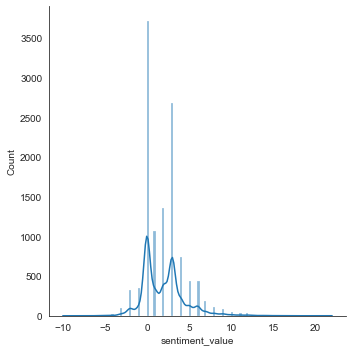

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style(style='white') 

sns.displot(data=sent_df,x='sentiment_value',kde=True)
plt.show()

In [83]:
## line plot

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

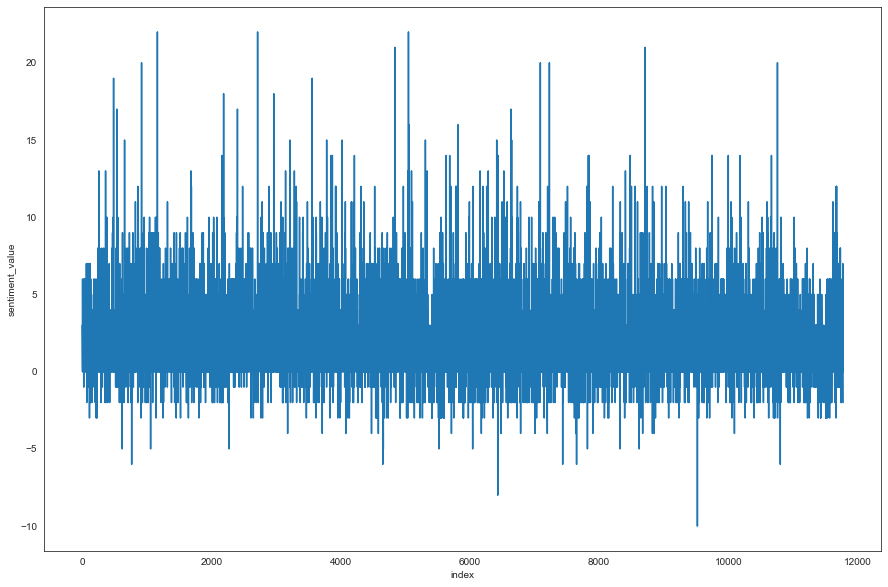

In [84]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

In [85]:
## scatter plot

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

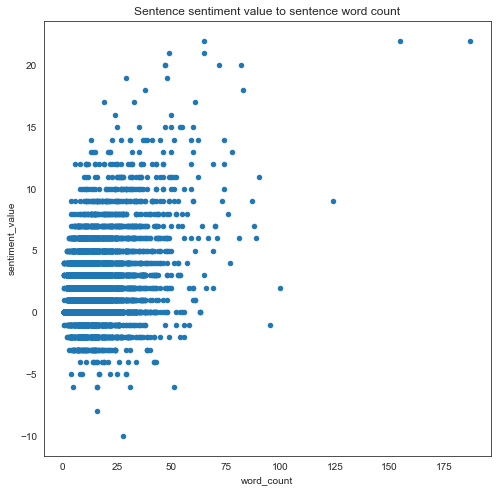

In [86]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

In [87]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [101]:
''.join(list(sent_df['sentence']))

'I thought it would be as big as small paper but turn out to be just like my palm.I think it is too small to read on it... not very comfortable as regular Kindle.Would definitely recommend a paperwhite instead.This kindle is light and easy to use especially at the beach!!!Didnt know how much i\'d use a kindle so went for the lower end.im happy with it, even if its a little dark I am 100 happy with my purchase.I caught it on sale at a really good price.I am normally a real book person, but I have a 1 year old who loves ripping up pages.The Kindle prevents that, it\'s extremely portable (it fits better in my purse than a giant book), and I have it loaded with lots of books.I finish one and start another, without having to go store.It serves all my needs.I picked this one over the Paperwhite because the price was unbeatable and the only difference that I could see was this one wasn\'t backlit.A simple book light from the Dollar tree solves that issue.This is my second Kindle (the first be

In [103]:
merged = ' '.join(list(sent_df['sentence']))

In [105]:
# Remove Punctuations 
no_punc_text= merged.translate(str.maketrans('','',string.punctuation))
no_punc_text

'I thought it would be as big as small paper but turn out to be just like my palm I think it is too small to read on it not very comfortable as regular Kindle Would definitely recommend a paperwhite instead This kindle is light and easy to use especially at the beach Didnt know how much id use a kindle so went for the lower end im happy with it even if its a little dark I am 100 happy with my purchase I caught it on sale at a really good price I am normally a real book person but I have a 1 year old who loves ripping up pages The Kindle prevents that its extremely portable it fits better in my purse than a giant book and I have it loaded with lots of books I finish one and start another without having to go store It serves all my needs I picked this one over the Paperwhite because the price was unbeatable and the only difference that I could see was this one wasnt backlit A simple book light from the Dollar tree solves that issue This is my second Kindle the first being the old Keyboar

In [109]:
text_tokens= word_tokenize(no_punc_text)
print(text_tokens)

['I', 'thought', 'it', 'would', 'be', 'as', 'big', 'as', 'small', 'paper', 'but', 'turn', 'out', 'to', 'be', 'just', 'like', 'my', 'palm', 'I', 'think', 'it', 'is', 'too', 'small', 'to', 'read', 'on', 'it', 'not', 'very', 'comfortable', 'as', 'regular', 'Kindle', 'Would', 'definitely', 'recommend', 'a', 'paperwhite', 'instead', 'This', 'kindle', 'is', 'light', 'and', 'easy', 'to', 'use', 'especially', 'at', 'the', 'beach', 'Didnt', 'know', 'how', 'much', 'id', 'use', 'a', 'kindle', 'so', 'went', 'for', 'the', 'lower', 'end', 'im', 'happy', 'with', 'it', 'even', 'if', 'its', 'a', 'little', 'dark', 'I', 'am', '100', 'happy', 'with', 'my', 'purchase', 'I', 'caught', 'it', 'on', 'sale', 'at', 'a', 'really', 'good', 'price', 'I', 'am', 'normally', 'a', 'real', 'book', 'person', 'but', 'I', 'have', 'a', '1', 'year', 'old', 'who', 'loves', 'ripping', 'up', 'pages', 'The', 'Kindle', 'prevents', 'that', 'its', 'extremely', 'portable', 'it', 'fits', 'better', 'in', 'my', 'purse', 'than', 'a', 'g

In [115]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [112]:
# Remove Stopwords
my_stop_words= stopwords.words('english')

sw_list= ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens= [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['thought', 'would', 'big', 'small', 'paper', 'turn', 'like', 'palm', 'think', 'small', 'read', 'comfortable', 'regular', 'Kindle', 'Would', 'definitely', 'recommend', 'paperwhite', 'instead', 'This', 'kindle', 'light', 'easy', 'use', 'especially', 'beach', 'Didnt', 'know', 'much', 'id', 'use', 'kindle', 'went', 'lower', 'end', 'im', 'happy', 'even', 'little', 'dark', '100', 'happy', 'purchase', 'caught', 'sale', 'really', 'good', 'price', 'normally', 'real', 'book', 'person', '1', 'year', 'old', 'loves', 'ripping', 'pages', 'The', 'Kindle', 'prevents', 'extremely', 'portable', 'fits', 'better', 'purse', 'giant', 'book', 'loaded', 'lots', 'books', 'finish', 'one', 'start', 'another', 'without', 'go', 'store', 'It', 'serves', 'needs', 'picked', 'one', 'Paperwhite', 'price', 'unbeatable', 'difference', 'could', 'see', 'one', 'wasnt', 'backlit', 'A', 'simple', 'book', 'light', 'Dollar', 'tree', 'solves', 'issue', 'This', 'second', 'Kindle', 'first', 'old', 'Keyboard', 'model', 'put', 'fel

In [113]:
# Normalize the data
lower_words= [Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

['this', 'second', 'kindle', 'first', 'old', 'keyboard', 'model', 'put', 'fell', 'love', 'keyboard', 'lol', 'likely', 'wont', 'last', 'solid', 'entry', 'level', 'kindle', 'great', 'kids', 'gifted', 'kid', 'friend', 'love', 'use', 'read', 'ipads', 'battery', 'good', 'higher', 'model', 'bit', 'better', 'this', 'make', 'excellent', 'ebook', 'reader', 'dont', 'expect', 'much', 'device', 'except', 'read', 'basic', 'ebooks', 'the', 'good', 'thing', 'cheap', 'good', 'read', 'sun', 'ordered', 'daughter', 'black', 'paperwhite', 'love', 'read', 'quite', 'bit', 'larger', 'books', 'driving', 'crazy', 'hold', 'laying', 'wanting', 'take', 'book', 'vacation', 'lugging', 'around', 'thick', 'paperback', 'throw', 'bag', 'read', 'anywhere', 'its', 'light', 'weight', 'easy', 'use', 'battery', 'life', 'lasts', 'weeks', 'makes', 'around', 'awesome', 'device', 'my', 'daughter', 'public', 'school', 'offer', 'online', 'library']


In [116]:
# Stemming (Optional)
ps= PorterStemmer()
stemmed_tokens= [ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['thi', 'second', 'kindl', 'first', 'old', 'keyboard', 'model', 'put', 'fell', 'love', 'keyboard', 'lol', 'like', 'wont', 'last', 'solid', 'entri', 'level', 'kindl', 'great', 'kid', 'gift', 'kid', 'friend', 'love', 'use', 'read', 'ipad', 'batteri', 'good', 'higher', 'model', 'bit', 'better', 'thi', 'make', 'excel', 'ebook', 'reader', 'dont', 'expect', 'much', 'devic', 'except', 'read', 'basic', 'ebook', 'the', 'good', 'thing', 'cheap', 'good', 'read', 'sun', 'order', 'daughter', 'black', 'paperwhit', 'love', 'read', 'quit', 'bit', 'larger', 'book', 'drive', 'crazi', 'hold', 'lay', 'want', 'take', 'book', 'vacat', 'lug', 'around', 'thick', 'paperback', 'throw', 'bag', 'read', 'anywher', 'it', 'light', 'weight', 'easi', 'use', 'batteri', 'life', 'last', 'week', 'make', 'around', 'awesom', 'devic', 'my', 'daughter', 'public', 'school', 'offer', 'onlin', 'librari']


In [117]:
# Lemmatization
import spacy
from spacy.lang.en.examples import sentences
nlp= spacy.load('en_core_web_sm')
doc= nlp(' '.join(lower_words))
print(doc)

thought would big small paper turn like palm think small read comfortable regular kindle would definitely recommend paperwhite instead this kindle light easy use especially beach didnt know much id use kindle went lower end im happy even little dark 100 happy purchase caught sale really good price normally real book person 1 year old loves ripping pages the kindle prevents extremely portable fits better purse giant book loaded lots books finish one start another without go store it serves needs picked one paperwhite price unbeatable difference could see one wasnt backlit a simple book light dollar tree solves issue this second kindle first old keyboard model put fell love keyboard lol likely wont last solid entry level kindle great kids gifted kid friend love use read ipads battery good higher model bit better this make excellent ebook reader dont expect much device except read basic ebooks the good thing cheap good read sun ordered daughter black paperwhite love read quite bit larger 

In [118]:
lemmas= [token.lemma_ for token in doc]
print(lemmas)

['think', 'would', 'big', 'small', 'paper', 'turn', 'like', 'palm', 'think', 'small', 'read', 'comfortable', 'regular', 'kindle', 'would', 'definitely', 'recommend', 'paperwhite', 'instead', 'this', 'kindle', 'light', 'easy', 'use', 'especially', 'beach', 'do', 'not', 'know', 'much', 'i', 'd', 'use', 'kindle', 'go', 'low', 'end', 'I', 'm', 'happy', 'even', 'little', 'dark', '100', 'happy', 'purchase', 'catch', 'sale', 'really', 'good', 'price', 'normally', 'real', 'book', 'person', '1', 'year', 'old', 'love', 'rip', 'page', 'the', 'kindle', 'prevent', 'extremely', 'portable', 'fit', 'well', 'purse', 'giant', 'book', 'load', 'lot', 'book', 'finish', 'one', 'start', 'another', 'without', 'go', 'store', 'it', 'serve', 'need', 'pick', 'one', 'paperwhite', 'price', 'unbeatable', 'difference', 'could', 'see', 'one', 'be', 'not', 'backlit', 'a', 'simple', 'book', 'light', 'dollar', 'tree', 'solve', 'issue', 'this', 'second', 'kindle', 'first', 'old', 'keyboard', 'model', 'put', 'fell', 'love'

In [119]:
clean_comments= ' '.join(lemmas)
clean_comments

'think would big small paper turn like palm think small read comfortable regular kindle would definitely recommend paperwhite instead this kindle light easy use especially beach do not know much i d use kindle go low end I m happy even little dark 100 happy purchase catch sale really good price normally real book person 1 year old love rip page the kindle prevent extremely portable fit well purse giant book load lot book finish one start another without go store it serve need pick one paperwhite price unbeatable difference could see one be not backlit a simple book light dollar tree solve issue this second kindle first old keyboard model put fell love keyboard lol likely will not last solid entry level kindle great kids gifted kid friend love use read ipad battery good high model bit well this make excellent ebook reader do not expect much device except read basic ebook the good thing cheap good read sun order daughter black paperwhite love read quite bit large book drive crazy hold la

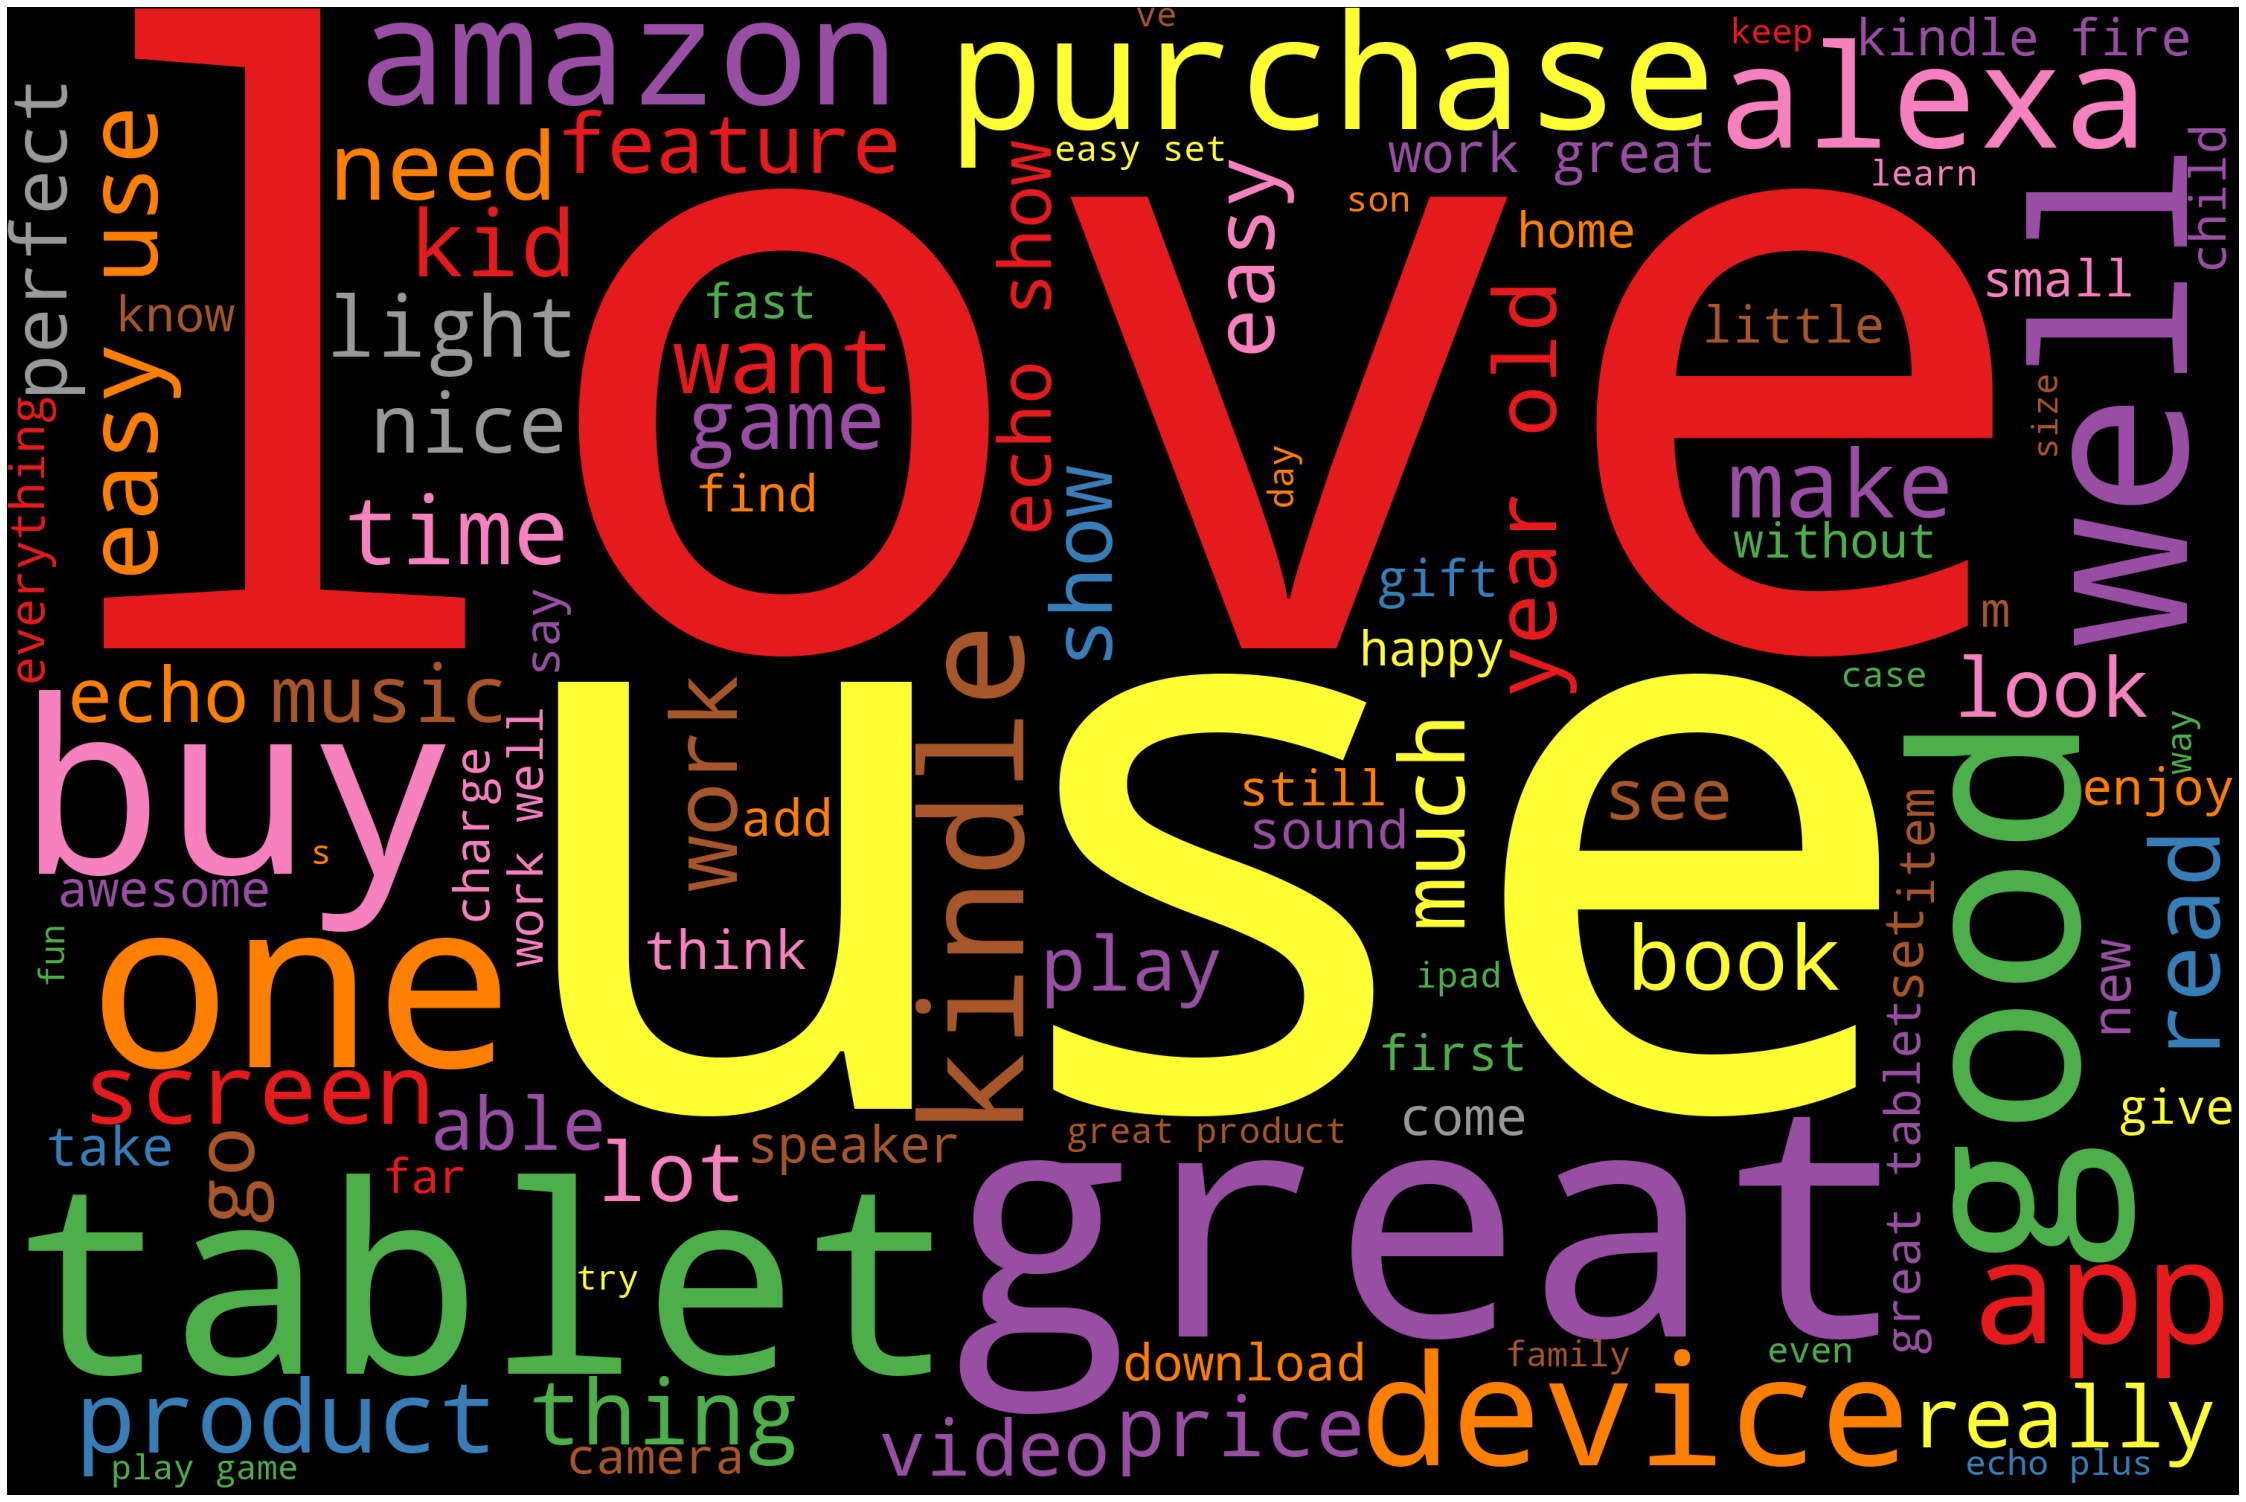

In [120]:
# Generate wordcloud
stopwords= STOPWORDS
stopwords.add('pron')
stopwords.add('rt')
stopwords.add('yeah')
wordcloud= WordCloud(width= 3000, height= 2000, background_color= 'black', max_words= 100,colormap= 'Set1',stopwords=stopwords).generate(clean_comments)
# Plot
plot_cloud(wordcloud)
